>I'm glad to come to see my page.
>
>I'm a 4th year undergraduate student at Toyota Technological Institute.
>
>In this Competition, I would like to try to train and know a way how to use a variety of algorithms,
>
        which are 
        
            ・In-depth Analysis of Missing Values (How to fill in etc...)
        
            ・Linear Regression (Simple Regression and Multiple Regression)
        
            ・SVM

Check kaggle notebook or local

In [1]:
import os
# Check if the code is running in Kaggle notebook environment
if 'kaggle' in os.listdir('/'):
    for dirname, _, filenames in os.walk('/kaggle/input'):
        for filename in filenames:
            print(os.path.join(dirname, filename))
else:
    print("Not running in Kaggle notebook environment. Skipping code.")

Not running in Kaggle notebook environment. Skipping code.


Check google notebook or local

In [2]:
import sys
print(sys.executable)
#  Google colab環境であるか判定
if 'google.colab' in sys.modules:
    # マウントを行う
    from google.colab import drive
    drive.mount('/content/drive')
    # ライブラリのインストール
    !pip install opencv-python==4.5.5.62
    !pip install japanize-matplotlib
    !pip install xgboost
    import seaborn as sns
    sns.set(font='IPAexGothic')  # seabornのグラフに対して'IPAexGothic'フォントを指定
else:
    print("Not Google Colab")

/Users/uenokoumare/anaconda3/bin/python
Not Google Colab


Foundation for Data Science and Machine Learning

In [3]:
# Base 
# -----------------------------------
import pandas as pd    # data processing
import numpy as np    # linear algebra
import scipy as sp
import csv
import pickle
import cv2
import matplotlib.pyplot as plt    # 可視化のためのモジュール
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)    # 不要な警告メッセージを出さないようにしています
from IPython.display import Image    # 画像表示のためのモジュール


# 精度評価のためのモジュールをインポート(SKLEARNはMLのためのモジュール)(組み込みデータセット)
# -----------------------------------
from sklearn import linear_model
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler #標準化
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression as LR
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb

# Configuration
# -----------------------------------
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
plt.rcParams['font.family'] = 'sans-serif'  # 代替のフォントを指定（例：sans-serif）
plt.rcParams['font.family'] = 'DejaVu Sans'  # または別のデフォルトフォントを指定

# 乱数シードを指定
np.random.seed(seed=0)

>Import Data

Description of Data

(English)
- - - -
MSSubClass: The building class.

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: The general zoning classification.

       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

LotFrontage: Linear feet of street connected to property.

LotArea: Lot size in square feet.

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

- - - -

In [4]:
# Import
if 'kaggle' in os.listdir('/'):
    train = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
    test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")
    sample = pd.read_csv("../input/house-prices-advanced-regression-techniques/sample_submission.csv")
else:
    train = pd.read_csv("train.csv")
    test = pd.read_csv("test.csv")
    sample = pd.read_csv("sample_submission.csv")

#print(sample)
#print(sample.SalePrice)    # 最後にはsample.SalePriceに予測値を入れて提出する

# Dimensions
print("Data Shapes")
print("Train:",train.shape, "Test:",test.shape, "Sample:",sample.shape)

Data Shapes
Train: (1460, 81) Test: (1459, 80) Sample: (1459, 2)


Simple Data Exploration

In [5]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL        65.00     8450   Pave   NaN      Reg   
1   2          20       RL        80.00     9600   Pave   NaN      Reg   
2   3          60       RL        68.00    11250   Pave   NaN      IR1   
3   4          70       RL        60.00     9550   Pave   NaN      IR1   
4   5          60       RL        84.00    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0      196.00        Gd        TA      PConc       Gd       TA           No   
1        0.00        TA        TA     CBlock       Gd       TA           Gd   
2      162.00        Gd        TA      PConc       Gd       TA           Mn   
3        0.00        TA        TA     BrkTil       TA       Gd           No   
4      350.00        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [6]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH        80.00    11622   Pave   NaN      Reg   
1  1462          20       RL        81.00    14267   Pave   NaN      IR1   
2  1463          60       RL        74.00    13830   Pave   NaN      IR1   
3  1464          60       RL        78.00     9978   Pave   NaN      IR1   
4  1465         120       RL        43.00     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0        0.00        TA        TA     CBlock       TA       TA           No   
1      108.00        TA        TA     CBlock       TA       TA           No   
2        0.00        TA        TA      PConc       Gd       TA           No   
3       20.00        TA        TA      PConc       TA       TA           No   
4        0.00        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec      468.00          LwQ      144.00     270.00       882.00   
1          ALQ      923.00          Unf        0.00     406.00      1329.00   
2          GLQ      791.00          Unf        0.00     137.00       928.00   
3          GLQ      602.00          Unf        0.00     324.00       926.00   
4          ALQ      263.00          Unf        0.00    1017.00      1280.00   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896          0.00          0.00         1         0             2   
1       1329          0.00          0.00         1         1             3   
2       1629          0.00          0.00         2         1             3   
3       1604          0.00          0.00         2         1             3   
4       1280          0.00          0.00         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [7]:
sample.head()

Id  SalePrice
0  1461  169277.05
1  1462  187758.39
2  1463  183583.68
3  1464  179317.48
4  1465  150730.08

Check Data Structure and Data Types

In [8]:
# データ構造とデータ型をチェック
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Check Summary Statistics

In [9]:
# 要約統計量をチェック
train.describe()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
count 1460.00     1460.00      1201.00   1460.00      1460.00      1460.00   
mean   730.50       56.90        70.05  10516.83         6.10         5.58   
std    421.61       42.30        24.28   9981.26         1.38         1.11   
min      1.00       20.00        21.00   1300.00         1.00         1.00   
25%    365.75       20.00        59.00   7553.50         5.00         5.00   
50%    730.50       50.00        69.00   9478.50         6.00         5.00   
75%   1095.25       70.00        80.00  11601.50         7.00         6.00   
max   1460.00      190.00       313.00 215245.00        10.00         9.00   

       YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
count    1460.00       1460.00     1452.00     1460.00     1460.00    1460.00   
mean     1971.27       1984.87      103.69      443.64       46.55     567.24   
std        30.20         20.65      181.07      456.10      161.32     441.87   
min      1872.00       1950.00        0.00        0.00        0.00       0.00   
25%      1954.00       1967.00        0.00        0.00        0.00     223.00   
50%      1973.00       1994.00        0.00      383.50        0.00     477.50   
75%      2000.00       2004.00      166.00      712.25        0.00     808.00   
max      2010.00       2010.00     1600.00     5644.00     1474.00    2336.00   

       TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
count      1460.00   1460.00   1460.00       1460.00    1460.00       1460.00   
mean       1057.43   1162.63    346.99          5.84    1515.46          0.43   
std         438.71    386.59    436.53         48.62     525.48          0.52   
min           0.00    334.00      0.00          0.00     334.00          0.00   
25%         795.75    882.00      0.00          0.00    1129.50          0.00   
50%         991.50   1087.00      0.00          0.00    1464.00          0.00   
75%        1298.25   1391.25    728.00          0.00    1776.75          1.00   
max        6110.00   4692.00   2065.00        572.00    5642.00          3.00   

       BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
count       1460.00   1460.00   1460.00       1460.00       1460.00   
mean           0.06      1.57      0.38          2.87          1.05   
std            0.24      0.55      0.50          0.82          0.22   
min            0.00      0.00      0.00          0.00          0.00   
25%            0.00      1.00      0.00          2.00          1.00   
50%            0.00      2.00      0.00          3.00          1.00   
75%            0.00      2.00      1.00          3.00          1.00   
max            2.00      3.00      2.00          8.00          3.00   

       TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
count       1460.00     1460.00      1379.00     1460.00     1460.00   
mean           6.52        0.61      1978.51        1.77      472.98   
std            1.63        0.64        24.69        0.75      213.80   
min            2.00        0.00      1900.00        0.00        0.00   
25%            5.00        0.00      1961.00        1.00      334.50   
50%            6.00        1.00      1980.00        2.00      480.00   
75%            7.00        1.00      2002.00        2.00      576.00   
max           14.00        3.00      2010.00        4.00     1418.00   

       WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
count     1460.00      1460.00        1460.00    1460.00      1460.00   
mean        94.24        46.66          21.95       3.41        15.06   
std        125.34        66.26          61.12      29.32        55.76   
min          0.00         0.00           0.00       0.00         0.00   
25%          0.00         0.00           0.00       0.00         0.00   
50%          0.00        25.00           0.00       0.00         0.00   
75%        168.00        68.00           0.00   

In [10]:
# 要約統計量をチェック
train.describe(include = "all")

Id  MSSubClass MSZoning  LotFrontage   LotArea Street Alley  \
count  1460.00     1460.00     1460      1201.00   1460.00   1460    91   
unique     NaN         NaN        5          NaN       NaN      2     2   
top        NaN         NaN       RL          NaN       NaN   Pave  Grvl   
freq       NaN         NaN     1151          NaN       NaN   1454    50   
mean    730.50       56.90      NaN        70.05  10516.83    NaN   NaN   
std     421.61       42.30      NaN        24.28   9981.26    NaN   NaN   
min       1.00       20.00      NaN        21.00   1300.00    NaN   NaN   
25%     365.75       20.00      NaN        59.00   7553.50    NaN   NaN   
50%     730.50       50.00      NaN        69.00   9478.50    NaN   NaN   
75%    1095.25       70.00      NaN        80.00  11601.50    NaN   NaN   
max    1460.00      190.00      NaN       313.00 215245.00    NaN   NaN   

       LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
count      1460        1460      1460      1460      1460         1460   
unique        4           4         2         5         3           25   
top         Reg         Lvl    AllPub    Inside       Gtl        NAmes   
freq        925        1311      1459      1052      1382          225   
mean        NaN         NaN       NaN       NaN       NaN          NaN   
std         NaN         NaN       NaN       NaN       NaN          NaN   
min         NaN         NaN       NaN       NaN       NaN          NaN   
25%         NaN         NaN       NaN       NaN       NaN          NaN   
50%         NaN         NaN       NaN       NaN       NaN          NaN   
75%         NaN         NaN       NaN       NaN       NaN          NaN   
max         NaN         NaN       NaN       NaN       NaN          NaN   

       Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
count        1460       1460     1460       1460      1460.00      1460.00   
unique          9          8        5          8          NaN          NaN   
top          Norm       Norm     1Fam     1Story          NaN          NaN   
freq         1260       1445     1220        726          NaN          NaN   
mean          NaN        NaN      NaN        NaN         6.10         5.58   
std           NaN        NaN      NaN        NaN         1.38         1.11   
min           NaN        NaN      NaN        NaN         1.00         1.00   
25%           NaN        NaN      NaN        NaN         5.00         5.00   
50%           NaN        NaN      NaN        NaN         6.00         5.00   
75%           NaN        NaN      NaN        NaN         7.00         6.00   
max           NaN        NaN      NaN        NaN        10.00         9.00   

        YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
count     1460.00       1460.00      1460     1460        1460        1460   
unique        NaN           NaN         6        8          15          16   
top           NaN           NaN     Gable  CompShg     VinylSd     VinylSd   
freq          NaN           NaN      1141     1434         515         504   
mean      1971.27       1984.87       NaN      NaN         NaN         NaN   
std         30.20         20.65       NaN      NaN         NaN         NaN   
min       1872.00       1950.00       NaN      NaN         NaN         NaN   
25%       1954.00       1967.00       NaN      NaN         NaN         NaN   
50%       1973.00       1994.00       NaN      NaN         NaN         NaN   
75%       2000.00       2004.00       NaN      NaN         NaN         NaN   
max       2010.00       2010.00       NaN      NaN         NaN         NaN   

       MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
count        1452     1452.00      1460      1460       1460     1423   
unique          4         NaN         4         5          6        4   
top          None         NaN        TA        TA      PConc       TA   
freq          864         NaN       906      1282       

Check Missing Values

In [11]:
# 欠損のチェック(最初の10列だけ表示)
print("train :")
print(train.isnull().sum().head(10))

train :
Id                0
MSSubClass        0
MSZoning          0
LotFrontage     259
LotArea           0
Street            0
Alley          1369
LotShape          0
LandContour       0
Utilities         0
dtype: int64


In [12]:
# 欠損値のある列の欠損値数を表示
print("train :")
for column_index in range(len(train.columns)):
    col_name = train.columns[column_index]
    missing_count = train[col_name].isnull().sum()
    if missing_count > 0:  # 欠損がある場合のみ表示
        print(f" {col_name} の欠損値数(Number of Missing Values): {missing_count}")


train :
 LotFrontage の欠損値数(Number of Missing Values): 259
 Alley の欠損値数(Number of Missing Values): 1369
 MasVnrType の欠損値数(Number of Missing Values): 8
 MasVnrArea の欠損値数(Number of Missing Values): 8
 BsmtQual の欠損値数(Number of Missing Values): 37
 BsmtCond の欠損値数(Number of Missing Values): 37
 BsmtExposure の欠損値数(Number of Missing Values): 38
 BsmtFinType1 の欠損値数(Number of Missing Values): 37
 BsmtFinType2 の欠損値数(Number of Missing Values): 38
 Electrical の欠損値数(Number of Missing Values): 1
 FireplaceQu の欠損値数(Number of Missing Values): 690
 GarageType の欠損値数(Number of Missing Values): 81
 GarageYrBlt の欠損値数(Number of Missing Values): 81
 GarageFinish の欠損値数(Number of Missing Values): 81
 GarageQual の欠損値数(Number of Missing Values): 81
 GarageCond の欠損値数(Number of Missing Values): 81
 PoolQC の欠損値数(Number of Missing Values): 1453
 Fence の欠損値数(Number of Missing Values): 1179
 MiscFeature の欠損値数(Number of Missing Values): 1406


In [13]:
print("test :")
for column_index in range(len(train.columns)):
    col_name = train.columns[column_index]
    missing_count = train[col_name].isnull().sum()
    if missing_count > 0:  # 欠損がある場合のみ表示
        print(f" {col_name} の欠損値数(Number of Missing Values): {missing_count}")

test :
 LotFrontage の欠損値数(Number of Missing Values): 259
 Alley の欠損値数(Number of Missing Values): 1369
 MasVnrType の欠損値数(Number of Missing Values): 8
 MasVnrArea の欠損値数(Number of Missing Values): 8
 BsmtQual の欠損値数(Number of Missing Values): 37
 BsmtCond の欠損値数(Number of Missing Values): 37
 BsmtExposure の欠損値数(Number of Missing Values): 38
 BsmtFinType1 の欠損値数(Number of Missing Values): 37
 BsmtFinType2 の欠損値数(Number of Missing Values): 38
 Electrical の欠損値数(Number of Missing Values): 1
 FireplaceQu の欠損値数(Number of Missing Values): 690
 GarageType の欠損値数(Number of Missing Values): 81
 GarageYrBlt の欠損値数(Number of Missing Values): 81
 GarageFinish の欠損値数(Number of Missing Values): 81
 GarageQual の欠損値数(Number of Missing Values): 81
 GarageCond の欠損値数(Number of Missing Values): 81
 PoolQC の欠損値数(Number of Missing Values): 1453
 Fence の欠損値数(Number of Missing Values): 1179
 MiscFeature の欠損値数(Number of Missing Values): 1406


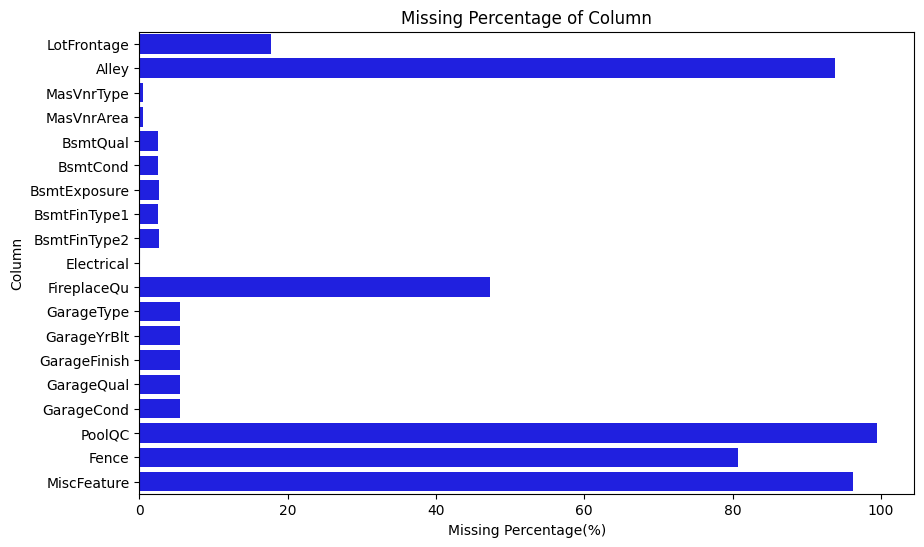

In [14]:
# 欠損値の割合を計算
missing_percentage = (train.isnull().sum() / len(train)) * 100

# 欠損値の割合が0以上の列のみを抽出
missing_percentage = missing_percentage[missing_percentage > 0]

# データフレームを作成して可視化
missing_df = pd.DataFrame({'Column': missing_percentage.index, 'Missing Percentage': missing_percentage.values})
plt.figure(figsize=(10, 6))
sns.barplot(x='Missing Percentage', y='Column', data=missing_df, color='blue')
plt.title('Missing Percentage of Column')
plt.xlabel('Missing Percentage(%)')
plt.ylabel('Column')
plt.show()

Number of Missing Values

- - -
 LotFrontage の欠損値数: 259：Is there anything that could be predicted? (Since it's the area of the road in front of the house, it seems quite significant)

 Alley の欠損値数: 1369：NaN means None of path so fill in None and One-Hot Encoding
 
 MasVnrType の欠損値数: 872：NaN means None of path so fill in None and One-Hot Encoding
  
 MasVnrArea の欠損値数: 8：Out of 1460, there are 1452 data points : delete only 8 rows
 
 BsmtQual の欠損値数: 37： 
 BsmtCond の欠損値数: 37：
 BsmtExposure の欠損値数: 38 : 
 BsmtFinType1 の欠損値数: 37 : 
 BsmtFinType2 の欠損値数: 38 : Because in same rows there also has NaN so delete 38 rows

 Electrical の欠損値数: 1 : Out of 1460, there are 1459 data points : delete only 1 rows
 
 FireplaceQu の欠損値数: 690 : NaN means No Fireplace so it will be "None" and using One-Hot Encoding
 
 GarageType の欠損値数: 81 : 
 GarageYrBlt の欠損値数: 81 :
 GarageFinish の欠損値数: 81 :
 GarageQual の欠損値数: 81 : 
 GarageCond の欠損値数: 81 : NaN will be "NoGarage" and using One-Hot Encoding 
 
     PoolQC の欠損値数: 1453：Out of 1460, there are only 7 data points : delete
 
Fence の欠損値数: 1179 : NaN will be "NoFence" and using One-Hot Encoding
 
 MiscFeature の欠損値数: 1406 : NaN will be "None" and using One-Hot Encoding

---
Fill in Missing Values
---

Fill in missing values of LotFrontage

        max is 313 (Outliers?)

        Expect for the max value and I will calculate the median.

        And fill in median.

Correlation between LotFrontage and SalePrice: 0.351799096570678


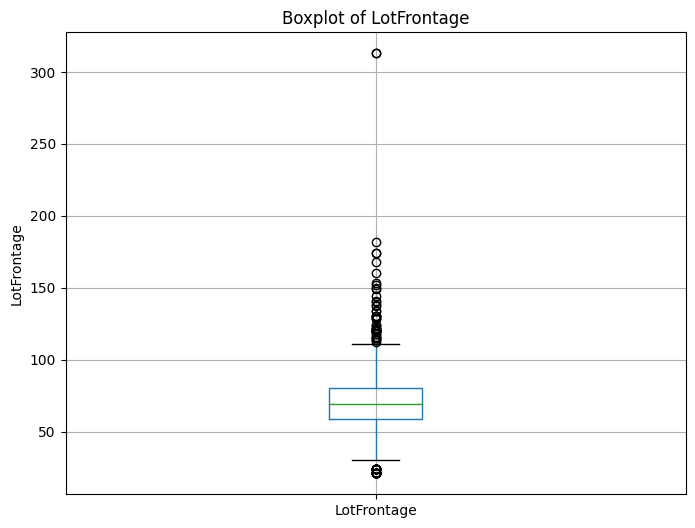

In [15]:
# "LotFrontage" と "SalePrice" の相関係数を計算 # LotFrontage: 敷地の道路に面した幅
correlation = train['LotFrontage'].corr(train['SalePrice'])
print("Correlation between LotFrontage and SalePrice:", correlation)

# "LotFrontage" の箱ひげ図を作成
plt.figure(figsize=(8, 6))
train.boxplot(column='LotFrontage')
plt.title("Boxplot of LotFrontage")
plt.ylabel("LotFrontage")
plt.show()

train[LotFrontage] : 0


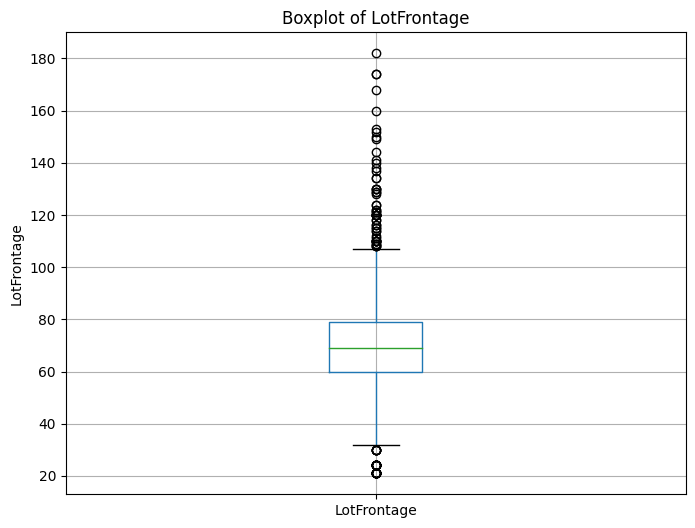

In [16]:
# train データフレームから特定の値を持つ行を削除
value_to_remove = train["LotFrontage"].max()
train = train[train["LotFrontage"] != value_to_remove]
#max_index = train[train["LotFrontage"] == 313.00].index
'''
平均値はmaxを外してもそこまで変らない
original_mean :  70.04995836802665
filtered_mean :  69.64470391993328
が、外れ値の影響を受けにくい中央値を使用する
'''
# 中央値を計算
original_median = train['LotFrontage'].median()
#print("original_median : ", original_median)
# original_median :  69.0

# 外れ値を中央値で置き換える
#train.loc[max_index, "LotFrontage"] = original_median

# 欠損値を特定の値以外の中央値で補完
train["LotFrontage"] = train["LotFrontage"].fillna(original_median)

# 欠損のチェック
print("train[LotFrontage] :", train["LotFrontage"].isnull().sum())

# "LotFrontage" の箱ひげ図を作成
plt.figure(figsize=(8, 6))
train.boxplot(column='LotFrontage')
plt.title("Boxplot of LotFrontage")
plt.ylabel("LotFrontage")
plt.show()

Fill in missing values of Alley

Alley: Type of alley access to property（物件への裏道のタイプ）

       Grvl	Gravel（砂利道）
       Pave	Paved（舗装道路）
       NA 	No alley access

NaN will be "None" and using One-Hot Encoding

In [17]:
# NaNを'None'に変換
train['Alley'] = train['Alley'].fillna('None')

# カテゴリ名と説明を分離して、カテゴリ名のみを抽出
train['Alley'] = train['Alley'].str.split('\s+').str[0]

# カテゴリの数を数える
value_counts = train['Alley'].value_counts()
print(value_counts)


None    1367
Grvl      50
Pave      41
Name: Alley, dtype: int64


In [18]:
#scikit-learnのOneHotEncoder()を用いてOne-Hotエンコーディングを実装
oe = OneHotEncoder(sparse = False,dtype = int)
sl_np = oe.fit_transform(train['Alley'].values.reshape(-1, 1))

#numpy.arrayからobject型に直す
sl_df = pd.DataFrame(data = sl_np, columns=["Alley_Grvl", "Alley_None", "Alley_Pave"])

# trainデータフレームにsl_dfを結合
train = pd.concat([train, sl_df], axis=1)

# trainデータフレームからAlley列を削除
train = train.drop(['Alley'], axis=1)

# 各カテゴリに対応する列の1の数を数える
grvl_count = train["Alley_Grvl"].sum()
none_count = train["Alley_None"].sum()
pave_count = train["Alley_Pave"].sum()

# 各カテゴリの1の数を表示
print("Grvl:", grvl_count)
print("None:", none_count)
print("Pave:", pave_count)

# Alley_Grvl列に欠損がある行を削除
train = train.dropna(subset=["Alley_Grvl"])
# Alley_None列に欠損がある行を削除
train = train.dropna(subset=["Alley_None"])
# Alley_Pave列に欠損がある行を削除
train = train.dropna(subset=["Alley_Pave"])

# 欠損のチェック
print("train[Alley_Grvl] :", train["Alley_Grvl"].isnull().sum())
print("train[Alley_None] :", train["Alley_None"].isnull().sum())
print("train[Alley_Pave] :", train["Alley_Pave"].isnull().sum())
#print(train.shape) # (1459, 83)

Grvl: 50.0
None: 1367.0
Pave: 41.0
train[Alley_Grvl] : 0
train[Alley_None] : 0
train[Alley_Pave] : 0


Fill in missing values of MasVnrType

MasVnrType: Masonry veneer type (住宅の外壁に使用される石造りやレンガなどの装飾的な素材)

       BrkCmn	Brick Common(レンガ)
       BrkFace	Brick Face（レンガ表面）
       CBlock	Cinder Block（シンダーブロック）
       None	　     　None
       Stone	Stone（石）

NaN will be "None" and using One-Hot Encoding

In [19]:
# NaNを'None'に変換
train["MasVnrType"] = train["MasVnrType"].fillna('None')

# カテゴリ名と説明を分離して、カテゴリ名のみを抽出
train["MasVnrType"] = train["MasVnrType"].str.split('\s+').str[0]

# カテゴリの数を数える
value_counts = train["MasVnrType"].value_counts()
print(value_counts)

None       871
BrkFace    445
Stone      127
BrkCmn      15
Name: MasVnrType, dtype: int64


In [20]:
#scikit-learnのOneHotEncoder()を用いてOne-Hotエンコーディングを実装
oe = OneHotEncoder(sparse = False,dtype = int)
sl_np = oe.fit_transform(train["MasVnrType"].values.reshape(-1, 1))

#numpy.arrayからobject型に直す
sl_df = pd.DataFrame(data=sl_np, columns=["MasVnrType_BrkCmn", "MasVnrType_BrkFace", "MasVnrType_None", "MasVnrType_Stone"])

# trainデータフレームにsl_dfを結合
train = pd.concat([train, sl_df], axis=1)

# trainデータフレームからMasVnrType列を削除
train = train.drop(["MasVnrType"], axis=1)

# 上記の列名で指定された列の1の数を数える
counts = train[["MasVnrType_BrkFace", "MasVnrType_None", "MasVnrType_Stone", "MasVnrType_BrkCmn"]].sum()

# 各列の1の数を表示
for column, count in counts.items():
    print(f"{column}: {count}")

#print(train.shape) #(1459, 86)


MasVnrType_BrkFace: 445
MasVnrType_None: 871
MasVnrType_Stone: 127
MasVnrType_BrkCmn: 15


Fill in missing values of MasVnrArea

MasVnrArea: Masonry veneer area in square feet(住宅の外壁に使用される石造りやレンガなどの装飾的な素材の面積)

Correlation between MasVnrArea and SalePrice: 0.4808984605491336


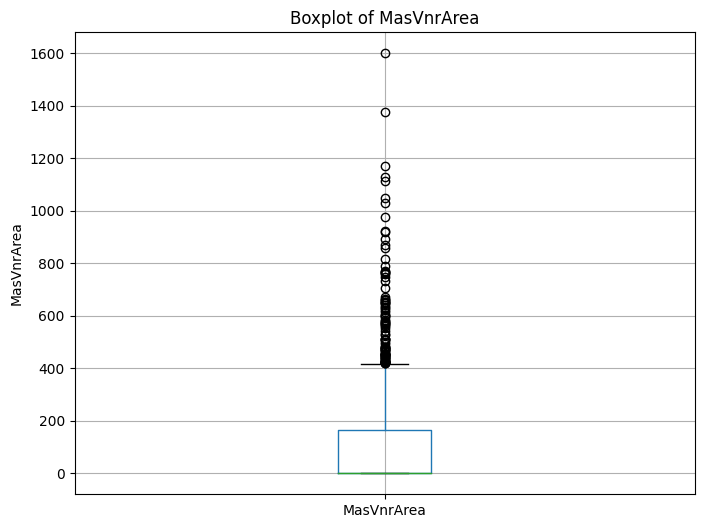

In [21]:
# "MasVnrArea" と "SalePrice" の相関係数を計算
correlation = train['MasVnrArea'].corr(train['SalePrice'])
print("Correlation between MasVnrArea and SalePrice:", correlation)

# "LotFrontage" の箱ひげ図を作成
plt.figure(figsize=(8, 6))
train.boxplot(column='MasVnrArea')
plt.title("Boxplot of MasVnrArea")
plt.ylabel("MasVnrArea")
plt.show()

In [22]:
# MasVnrArea列のNaN値を中央値で補完
median_value = train['MasVnrArea'].median()
train['MasVnrArea'].fillna(median_value, inplace=True)

# 欠損のチェック
print("train[MasVnrArea] :", train["MasVnrArea"].isnull().sum())


train[MasVnrArea] : 0


Fill in missing values of BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2

Because in same rows there also has NaN so delete 38 rows

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [23]:
# NaNを'NoBasement'に変換
train["BsmtQual"] = train["BsmtQual"].fillna('NoBasement')
train["BsmtCond"] = train["BsmtCond"].fillna('NoBasement')
train["BsmtExposure"] = train["BsmtExposure"].fillna('NoBasement')
train["BsmtFinType1"] = train["BsmtFinType1"].fillna('NoBasement')
train["BsmtFinType2"] = train["BsmtFinType2"].fillna('NoBasement')

# カテゴリ名と説明を分離して、カテゴリ名のみを抽出
train["BsmtQual"] = train["BsmtQual"].str.split('\s+').str[0]
train["BsmtCond"] = train["BsmtCond"].str.split('\s+').str[0]
train["BsmtExposure"] = train["BsmtExposure"].str.split('\s+').str[0]
train["BsmtFinType1"] = train["BsmtFinType1"].str.split('\s+').str[0]
train["BsmtFinType2"] = train["BsmtFinType2"].str.split('\s+').str[0]

# カテゴリの数を数える
value_counts = train["BsmtQual"].value_counts()
print(value_counts)

# 欠損のチェック
print("train[BsmtQual] :", train["BsmtQual"].isnull().sum())
print("train[BsmtCond] :", train["BsmtCond"].isnull().sum())
print("train[BsmtExposure] :", train["BsmtExposure"].isnull().sum())
print("train[BsmtFinType1] :", train["BsmtFinType1"].isnull().sum())
print("train[BsmtFinType2] :", train["BsmtFinType2"].isnull().sum())

TA            647
Gd            617
Ex            120
NoBasement     39
Fa             35
Name: BsmtQual, dtype: int64
train[BsmtQual] : 0
train[BsmtCond] : 0
train[BsmtExposure] : 0
train[BsmtFinType1] : 0
train[BsmtFinType2] : 0


Fill in missing values of Electrical

Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

In [24]:
# 各要素の出現頻度を計算
value_counts = train["Electrical"].value_counts()

# 各要素の出現頻度のパーセンテージを計算
percentages = value_counts / len(train) * 100

# 結果を表示
print("各要素の出現頻度とパーセンテージ:")
#print(value_counts)
print(percentages)

各要素の出現頻度とパーセンテージ:
SBrkr   91.29
FuseA    6.38
FuseF    1.85
FuseP    0.21
Mix      0.07
Name: Electrical, dtype: float64


In [25]:
# "Electrical" 列内の欠損値を持つ行を削除
train.dropna(subset=["Electrical"], inplace=True)

# 欠損のチェック
print("train[Electrical] :", train["Electrical"].isnull().sum())

train[Electrical] : 0


Fill in missing values of FireplaceQu

Fireplaces: Number of fireplaces(暖炉の数)

FireplaceQu: Fireplace quality(暖炉の品質)

       Ex	Excellent - Exceptional Masonry Fireplace(例外的なレンガ暖炉)
       Gd	Good - Masonry Fireplace in main level(1階のレンガ暖炉)
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement(メインリビングエリアのプレハブ暖炉または地下のレンガ暖炉)
       Fa	Fair - Prefabricated Fireplace in basement(地下のプレハブ暖炉)
       Po	Poor - Ben Franklin Stove(ベン・フランクリンストーブ)
       NA	No Fireplace(暖炉なし)

NaN will be "None" and using One-Hot Encoding

In [26]:
# 暖炉の品質ごとに数を数える
fireplace_quality_counts = train["FireplaceQu"].value_counts()

# 結果を表示
print(fireplace_quality_counts)

Gd    378
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64


In [27]:
# NaNを'None'に変換
train['FireplaceQu'] = train['FireplaceQu'].fillna('None')

# カテゴリ名と説明を分離して、カテゴリ名のみを抽出
train['FireplaceQu'] = train['FireplaceQu'].str.split('\s+').str[0]

# カテゴリの数を数える
value_counts = train['FireplaceQu'].value_counts()
print(value_counts)

# 欠損のチェック
print("train[FireplaceQu] :", train['FireplaceQu'].isnull().sum())

None    687
Gd      378
TA      313
Fa       33
Ex       24
Po       20
Name: FireplaceQu, dtype: int64
train[FireplaceQu] : 0


Fill in missing values of Garage

GarageType: Garage location(ガレージの場所)
		
       2Types	More than one type of garage(複数の種類のガレージ)
       Attchd	Attached to home(家に取り付け)
       Basment	Basement Garage(地下ガレージ)
       BuiltIn	Built-In (Garage part of house - typically has room above garage)(ビルトイン（家の一部としてのガレージ - 通常はガレージの上に部屋がある）)
       CarPort	Car Port(カーポート)
       Detchd	Detached from home(家から離れている)
       NA	        No Garage(ガレージなし)
		
GarageYrBlt: Year garage was built(ガレージが建てられた年)
		
GarageFinish: Interior finish of the garage(ガレージの仕上がり。)

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

GarageQual: Garage quality(ガレージの品質)

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition(ガレージのコンディション)

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

NaN will be "NoGarage" and using One-Hot Encoding

In [28]:
# NaNを'None'に変換
train["GarageType"] = train["GarageType"].fillna('NoGarage')
train["GarageFinish"] = train["GarageFinish"].fillna('NoGarage')
train["GarageQual"] = train["GarageQual"].fillna('NoGarage')
train["GarageCond"] = train["GarageCond"].fillna('NoGarage')

# カテゴリ名と説明を分離して、カテゴリ名のみを抽出
train["GarageType"] = train["GarageType"].str.split('\s+').str[0]
train["GarageFinish"] = train["GarageFinish"].str.split('\s+').str[0]
train["GarageQual"] = train["GarageQual"].str.split('\s+').str[0]
train["GarageCond"] = train["GarageCond"].str.split('\s+').str[0]

# 欠損のチェック
print("train[GarageType] :", train['GarageType'].isnull().sum())
print("train[GarageFinish] :", train['GarageFinish'].isnull().sum())
print("train[GarageQual] :", train['GarageQual'].isnull().sum())
print("train[GarageCond] :", train['GarageCond'].isnull().sum())

train[GarageType] : 0
train[GarageFinish] : 0
train[GarageQual] : 0
train[GarageCond] : 0


In [29]:
# GarageYrBlt列の平均値を求める
mean_value = train["GarageYrBlt"].mean()

# GarageYrBlt列の欠損値を平均値で補完
train["GarageYrBlt"].fillna(mean_value, inplace=True)

# 欠損のチェック
print("train[GarageYrBlt] :", train['GarageYrBlt'].isnull().sum())

train[GarageYrBlt] : 0


Fill in missing values of PoolQC

Out of 1460, there are only 7 data points : delete

In [30]:
# PoolQC列を削除
train = train.drop(["PoolQC"], axis=1)

Fill in missing values of Fence

Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	        Good Wood
       MnWw	        Minimum Wood/Wire
       NA     	No Fence

NaN will be "NoFence" and using One-Hot Encoding

In [31]:
# NaNを'None'に変換
train['Fence'] = train['Fence'].fillna('NoFence')

# カテゴリ名と説明を分離して、カテゴリ名のみを抽出
train['Fence'] = train['Fence'].str.split('\s+').str[0]

# カテゴリの数を数える
value_counts = train['Fence'].value_counts()
print(value_counts)

# 欠損のチェック
print("train[Fence] :", train['Fence'].isnull().sum())

NoFence    1174
MnPrv       157
GdPrv        59
GdWo         54
MnWw         11
Name: Fence, dtype: int64
train[Fence] : 0


Fill in missing values of MiscFeature

MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

NaN will be "None" and using One-Hot Encoding

In [32]:
# NaNを'None'に変換
train['MiscFeature'] = train['MiscFeature'].fillna('None')

# カテゴリ名と説明を分離して、カテゴリ名のみを抽出
train['MiscFeature'] = train['MiscFeature'].str.split('\s+').str[0]

# カテゴリの数を数える
value_counts = train['MiscFeature'].value_counts()
print(value_counts)

# 欠損のチェック
print("train[MiscFeature] :", train['MiscFeature'].isnull().sum())
#print(train.shape) # (1330, 85)

None    1401
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64
train[MiscFeature] : 0


trainデータに欠損値がないことを確認

In [33]:
# 欠損値のある列の欠損値数を表示
print("train :")
for column_index in range(len(train.columns)):
    col_name = train.columns[column_index]
    missing_count = train[col_name].isnull().sum()
    if missing_count > 0:  # 欠損がある場合のみ表示
        print(f" {col_name} の欠損値数(Number of Missing Values): {missing_count}")

train :


同様にtestデータの欠損値を補完していく

In [34]:
# 中央値を計算
original_median = test['LotFrontage'].median()
# "LotFrontage" 列の欠損値を中央値で置換
test["LotFrontage"].fillna(original_median, inplace=True)
# 欠損値を特定の値以外の平均値で補完
test["LotFrontage"] = test["LotFrontage"].fillna(original_median)

# NaNを'None'に変換
test['Alley'] = test['Alley'].fillna('None')
#scikit-learnのOneHotEncoder()を用いてOne-Hotエンコーディングを実装
oe = OneHotEncoder(sparse = False,dtype = int)
sl_np = oe.fit_transform(test['Alley'].values.reshape(-1, 1))
#numpy.arrayからobject型に直す
sl_df = pd.DataFrame(data = sl_np, columns=["Alley_Grvl", "Alley_None", "Alley_Pave"])
# testデータフレームにsl_dfを結合
test = pd.concat([test, sl_df], axis=1)
# testデータフレームからAlley列を削除
test = test.drop(['Alley'], axis=1)

# NaNを'None'に変換
test["MasVnrType"] = test["MasVnrType"].fillna('None')
#scikit-learnのOneHotEncoder()を用いてOne-Hotエンコーディングを実装
oe = OneHotEncoder(sparse = False,dtype = int)
sl_np = oe.fit_transform(test["MasVnrType"].values.reshape(-1, 1))
#numpy.arrayからobject型に直す
sl_df = pd.DataFrame(data=sl_np, columns=["MasVnrType_BrkCmn", "MasVnrType_BrkFace", "MasVnrType_None", "MasVnrType_Stone"])
# testデータフレームにsl_dfを結合
test = pd.concat([test, sl_df], axis=1)
# testデータフレームからAlley列を削除
test = test.drop(["MasVnrType"], axis=1)

# MasVnrArea列のNaN値を中央値で補完
median_value = train['MasVnrArea'].median()
train['MasVnrArea'].fillna(median_value, inplace=True)

# NaNを'NoBasement'に変換
test["BsmtQual"] = test["BsmtQual"].fillna('NoBasement')
test["BsmtCond"] = test["BsmtCond"].fillna('NoBasement')
test["BsmtExposure"] = test["BsmtExposure"].fillna('NoBasement')
test["BsmtFinType1"] = test["BsmtFinType1"].fillna('NoBasement')
test["BsmtFinType2"] = test["BsmtFinType2"].fillna('NoBasement')
# カテゴリ名と説明を分離して、カテゴリ名のみを抽出
test["BsmtQual"] = test["BsmtQual"].str.split('\s+').str[0]
test["BsmtCond"] = test["BsmtCond"].str.split('\s+').str[0]
test["BsmtExposure"] = test["BsmtExposure"].str.split('\s+').str[0]
test["BsmtFinType1"] = test["BsmtFinType1"].str.split('\s+').str[0]
test["BsmtFinType2"] = test["BsmtFinType2"].str.split('\s+').str[0]

# Electrical列の欠損値を "SBrkr" で補完
test["Electrical"].fillna("SBrkr", inplace=True)

# NaNを'None'に変換
test['FireplaceQu'] = test['FireplaceQu'].fillna('None')

# NaNを'NoGarage'に変換
test["GarageType"] = test["GarageType"].fillna('NoGarage')
test["GarageFinish"] = test["GarageFinish"].fillna('NoGarage')
test["GarageQual"] = test["GarageQual"].fillna('NoGarage')
test["GarageCond"] = test["GarageCond"].fillna('NoGarage')
test["GarageArea"] = test["GarageArea"].fillna('NoGarage')
test["GarageCars"] = test["GarageCars"].fillna('NoGarage')
# GarageYrBlt列の平均値を求める
mean_value = test["GarageYrBlt"].mean()
# GarageYrBlt列の欠損値を平均値で補完
test["GarageYrBlt"].fillna(mean_value, inplace=True)

# PoolQC列を削除
test = test.drop(["PoolQC"], axis=1)

# NaNを'None'に変換
test['Fence'] = test['Fence'].fillna('NoFence')

# NaNを'None'に変換
test['MiscFeature'] = test['MiscFeature'].fillna('None')

print("test :")
for column_index in range(len(train.columns)):
    col_name = train.columns[column_index]
    missing_count = train[col_name].isnull().sum()
    if missing_count > 0:  # 欠損がある場合のみ表示
        print(f" {col_name} の欠損値数(Number of Missing Values): {missing_count}")

test :


Check the correlation with SalePrice after performing one-hot encoding for relevant categorical features.

SalePriceとの相関関係を確認する
（その前にワンホットエンコーディングできるものはする）

In [35]:
"""
# 非数値列を選択
non_numeric_columns = train.select_dtypes(include=['object']).columns

print(non_numeric_columns)

#scikit-learnのOneHotEncoder()を用いてOne-Hotエンコーディングを実装
oe = OneHotEncoder(sparse = False,dtype = int)
sl_np = oe.fit_transform(train[non_numeric_columns].values.reshape(-1, 1))

#numpy.arrayからobject型に直す
sl_df = pd.DataFrame(data = sl_np, columns=non_numeric_columns)
# trainデータフレームにsl_dfを結合
train = pd.concat([train, sl_df], axis=1)

# 非数値列に対してワンホットエンコーディングを実行
#encoded = pd.get_dummies(train[non_numeric_columns], prefix='', prefix_sep='')

# エンコーディングされた特徴量を元のDataFrameに連結
train = pd.concat([train, encoded], axis=1)

# 元の非数値列を削除
train.drop(columns=non_numeric_columns, inplace=True)

train.head()
"""

"\n# 非数値列を選択\nnon_numeric_columns = train.select_dtypes(include=['object']).columns\n\nprint(non_numeric_columns)\n\n#scikit-learnのOneHotEncoder()を用いてOne-Hotエンコーディングを実装\noe = OneHotEncoder(sparse = False,dtype = int)\nsl_np = oe.fit_transform(train[non_numeric_columns].values.reshape(-1, 1))\n\n#numpy.arrayからobject型に直す\nsl_df = pd.DataFrame(data = sl_np, columns=non_numeric_columns)\n# trainデータフレームにsl_dfを結合\ntrain = pd.concat([train, sl_df], axis=1)\n\n# 非数値列に対してワンホットエンコーディングを実行\n#encoded = pd.get_dummies(train[non_numeric_columns], prefix='', prefix_sep='')\n\n# エンコーディングされた特徴量を元のDataFrameに連結\ntrain = pd.concat([train, encoded], axis=1)\n\n# 元の非数値列を削除\ntrain.drop(columns=non_numeric_columns, inplace=True)\n\ntrain.head()\n"

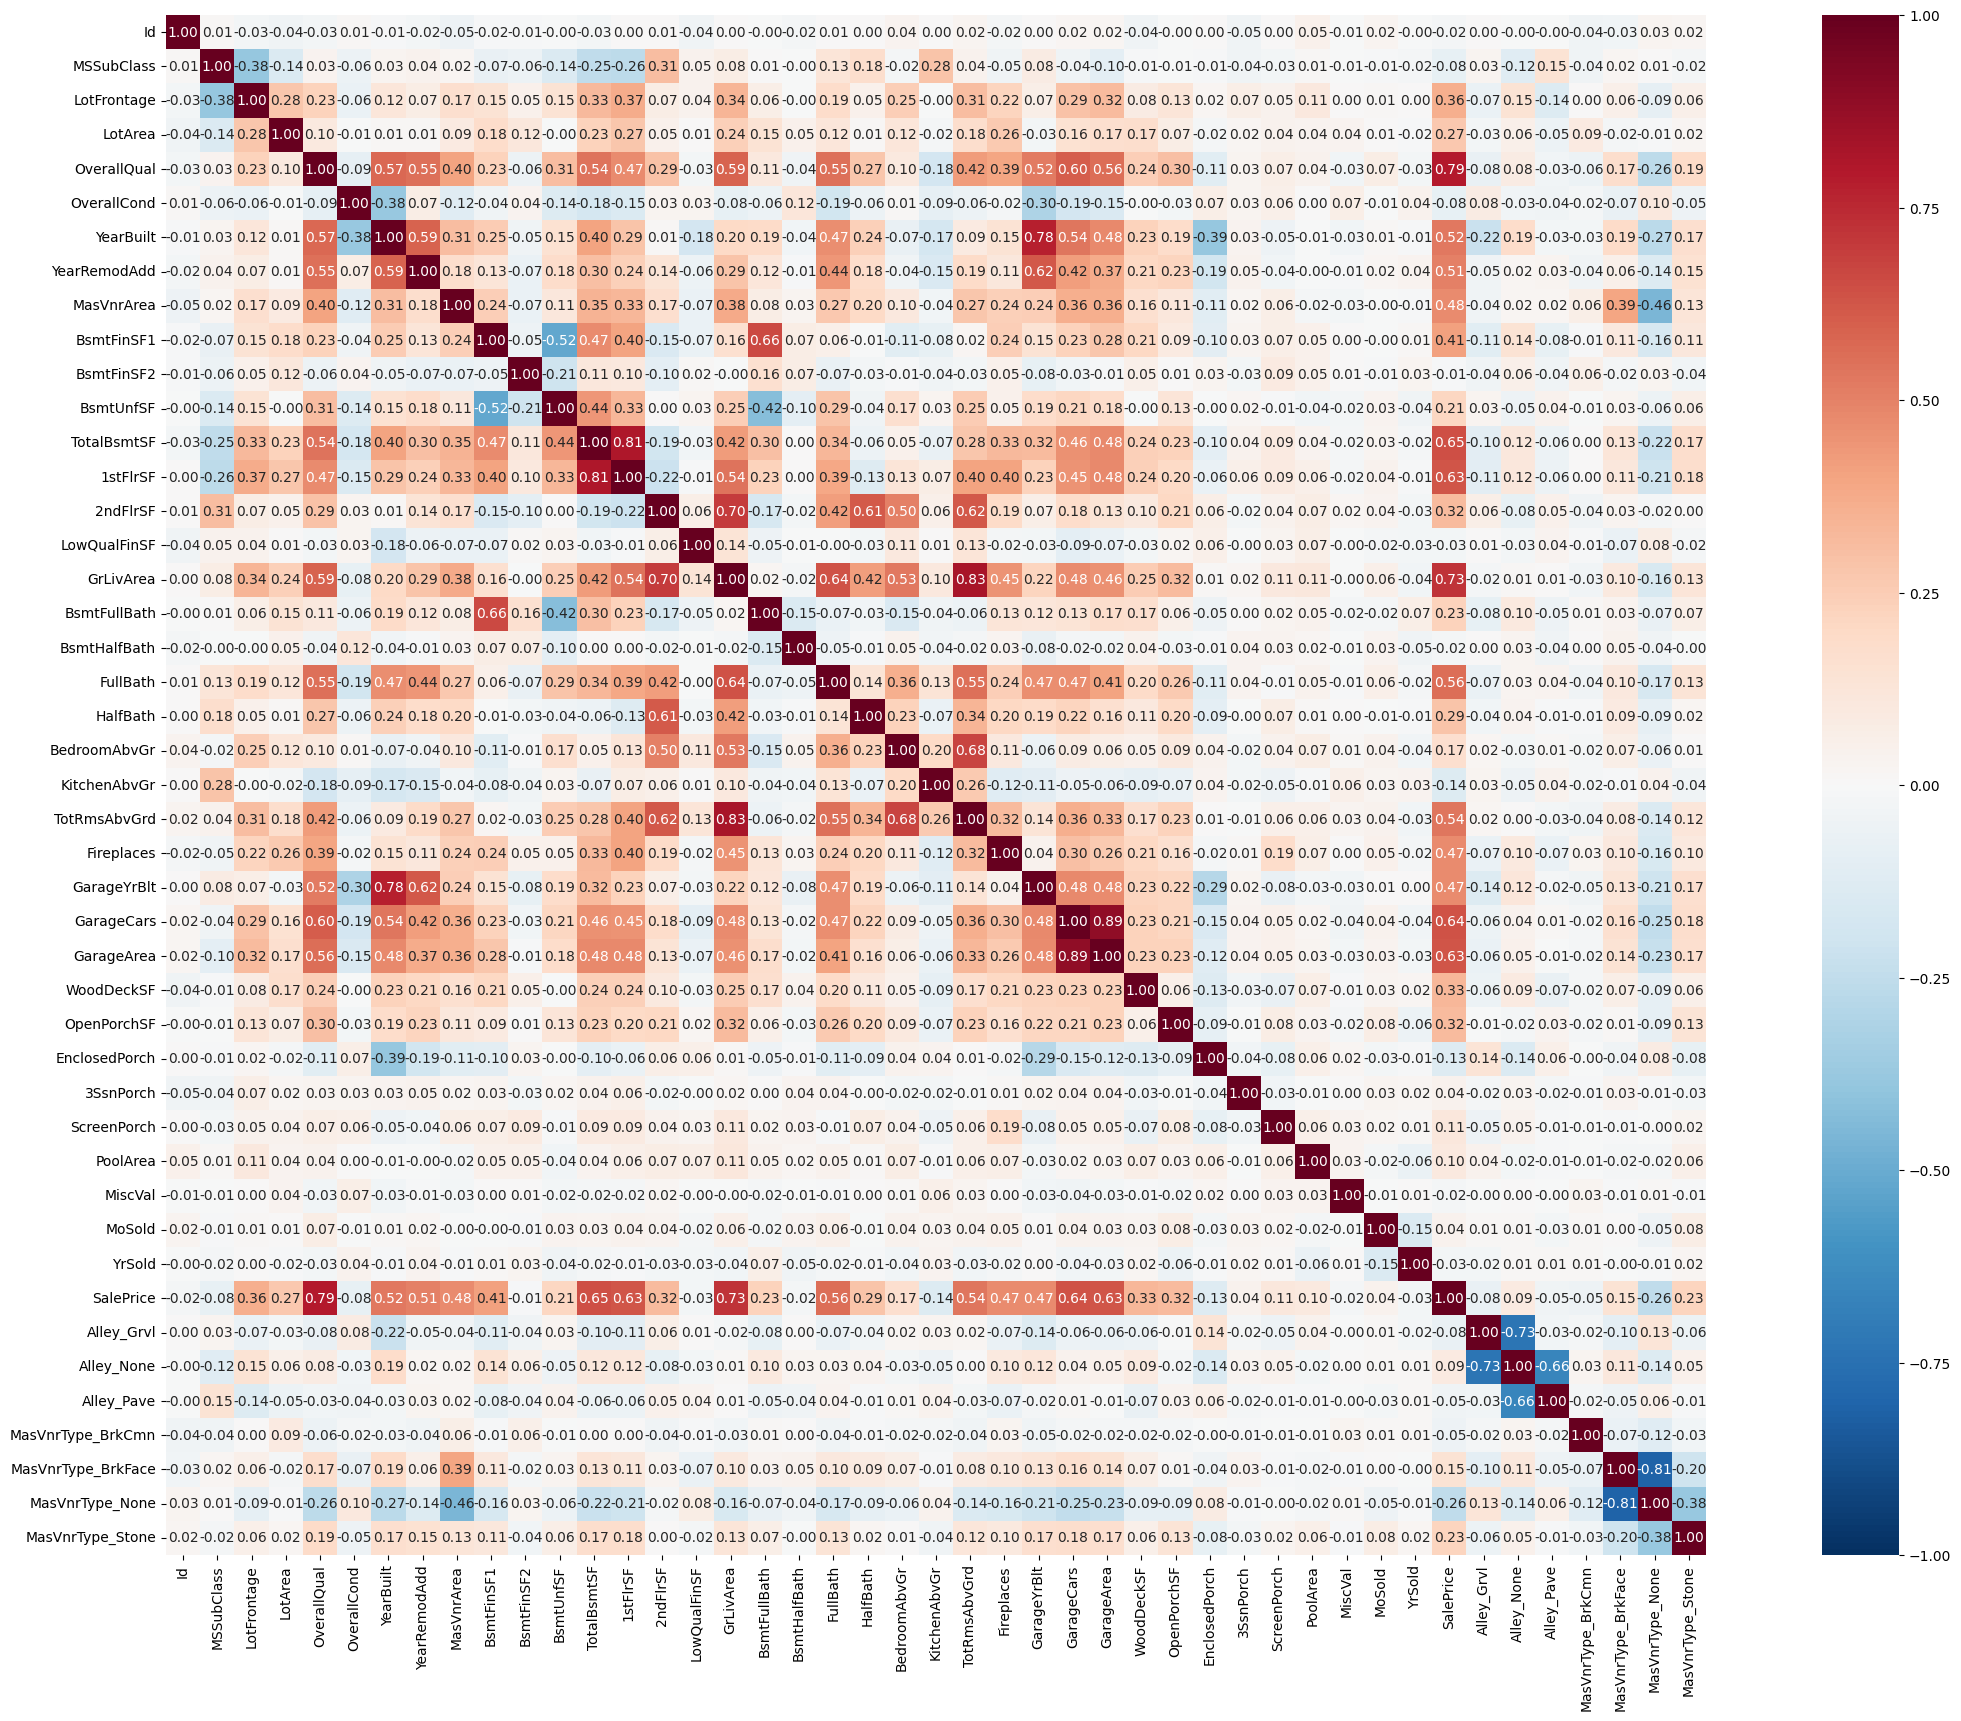

In [36]:
# 数値列のみを選択して相関行列を計算
numeric_columns = train.select_dtypes(include=[np.number])
corrmat = numeric_columns.corr()

# 相関行列を可視化
f, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corrmat, cmap="RdBu_r", annot=True, fmt=".2f", vmax=1, vmin=-1, square=True);


In [37]:
"""
# 今度はSalePriceとの相関関係を確認
correlation = train.corr()['SalePrice']

# 0.7以上の相関係数の列名を取得
high_correlation_columns = correlation[correlation >= 0.7].index.tolist()

# データの抽出と正規化
data = train[high_correlation_columns]
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)

# 主成分分析（PCA）を用いて次元削減
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(normalized_data)

# K平均クラスタリング
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(reduced_data)

# クラスタ結果の表示
clustered_data = data.copy()
clustered_data['Cluster'] = clusters
print(clustered_data["Cluster"])
"""

'\n# 今度はSalePriceとの相関関係を確認\ncorrelation = train.corr()[\'SalePrice\']\n\n# 0.7以上の相関係数の列名を取得\nhigh_correlation_columns = correlation[correlation >= 0.7].index.tolist()\n\n# データの抽出と正規化\ndata = train[high_correlation_columns]\nscaler = StandardScaler()\nnormalized_data = scaler.fit_transform(data)\n\n# 主成分分析（PCA）を用いて次元削減\npca = PCA(n_components=2)\nreduced_data = pca.fit_transform(normalized_data)\n\n# K平均クラスタリング\nkmeans = KMeans(n_clusters=3)\nclusters = kmeans.fit_predict(reduced_data)\n\n# クラスタ結果の表示\nclustered_data = data.copy()\nclustered_data[\'Cluster\'] = clusters\nprint(clustered_data["Cluster"])\n'

Analysing SalePrice

In [38]:
train['SalePrice'].describe()

count     1455.00
mean    180952.45
std      79548.85
min      34900.00
25%     129900.00
50%     163000.00
75%     214000.00
max     755000.00
Name: SalePrice, dtype: float64

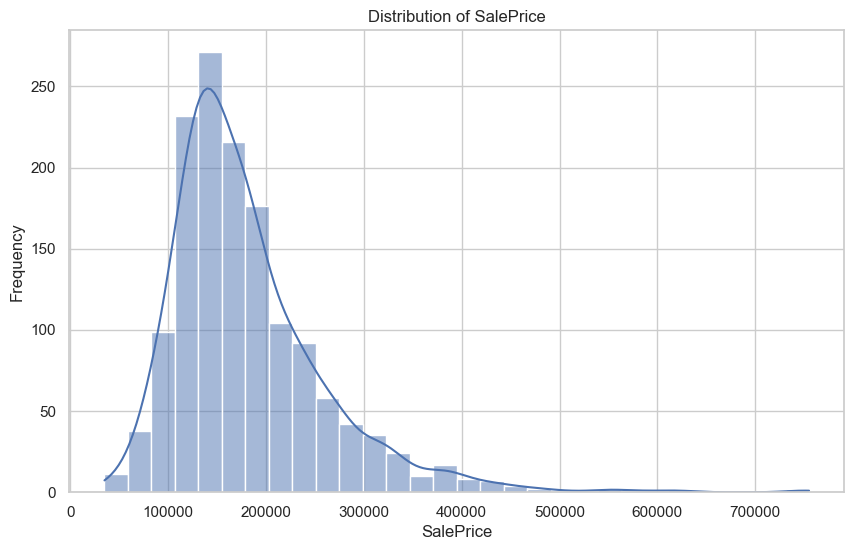

In [39]:
# Seabornのスタイルを設定（任意）
sns.set(style="whitegrid")

# データフレームの"SalePrice"列の分布を可視化
plt.figure(figsize=(10, 6))  # グラフのサイズを設定（任意）
sns.histplot(train["SalePrice"], bins=30, kde=True)  # ヒストグラムを描画
plt.title("Distribution of SalePrice")  # グラフのタイトルを設定（任意）
plt.xlabel("SalePrice")  # x軸のラベルを設定（任意）
plt.ylabel("Frequency")  # y軸のラベルを設定（任意）
plt.show()  # グラフを表示

SalePriceとの相関が0.7以上の変数を説明変数としてモデリングしていく

In [40]:
# データフレーム train の中にデータがあると仮定して、以下のように確認します。
numeric_columns = train.select_dtypes(include=['int64', 'float64']).columns
correlation = train[numeric_columns].corr()['SalePrice']

# 0.6以上の相関係数の列名を取得
high_correlation_columns_6 = correlation[correlation >= 0.6].index.tolist()
print("high_correlation_columns_6 : ", high_correlation_columns_6)

# 0.7以上の相関係数の列名を取得
high_correlation_columns_7 = correlation[correlation >= 0.7].index.tolist()
print("high_correlation_columns_7 : ", high_correlation_columns_7)

# SalePrice 列を除外して、各列について欠損値の有無を確認
for col in high_correlation_columns_6:
    if col != 'SalePrice' and train[col].isnull().any():
        print(f"train : Column {col} has missing values.")

# SalePrice 列を除外して、各列について欠損値の有無を確認
for col in high_correlation_columns_6:
    if col != 'SalePrice' and test[col].isnull().any():
        print(f"test : Column {col} has missing values.")

high_correlation_columns_6 :  ['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea', 'SalePrice']
high_correlation_columns_7 :  ['OverallQual', 'GrLivArea', 'SalePrice']
test : Column TotalBsmtSF has missing values.


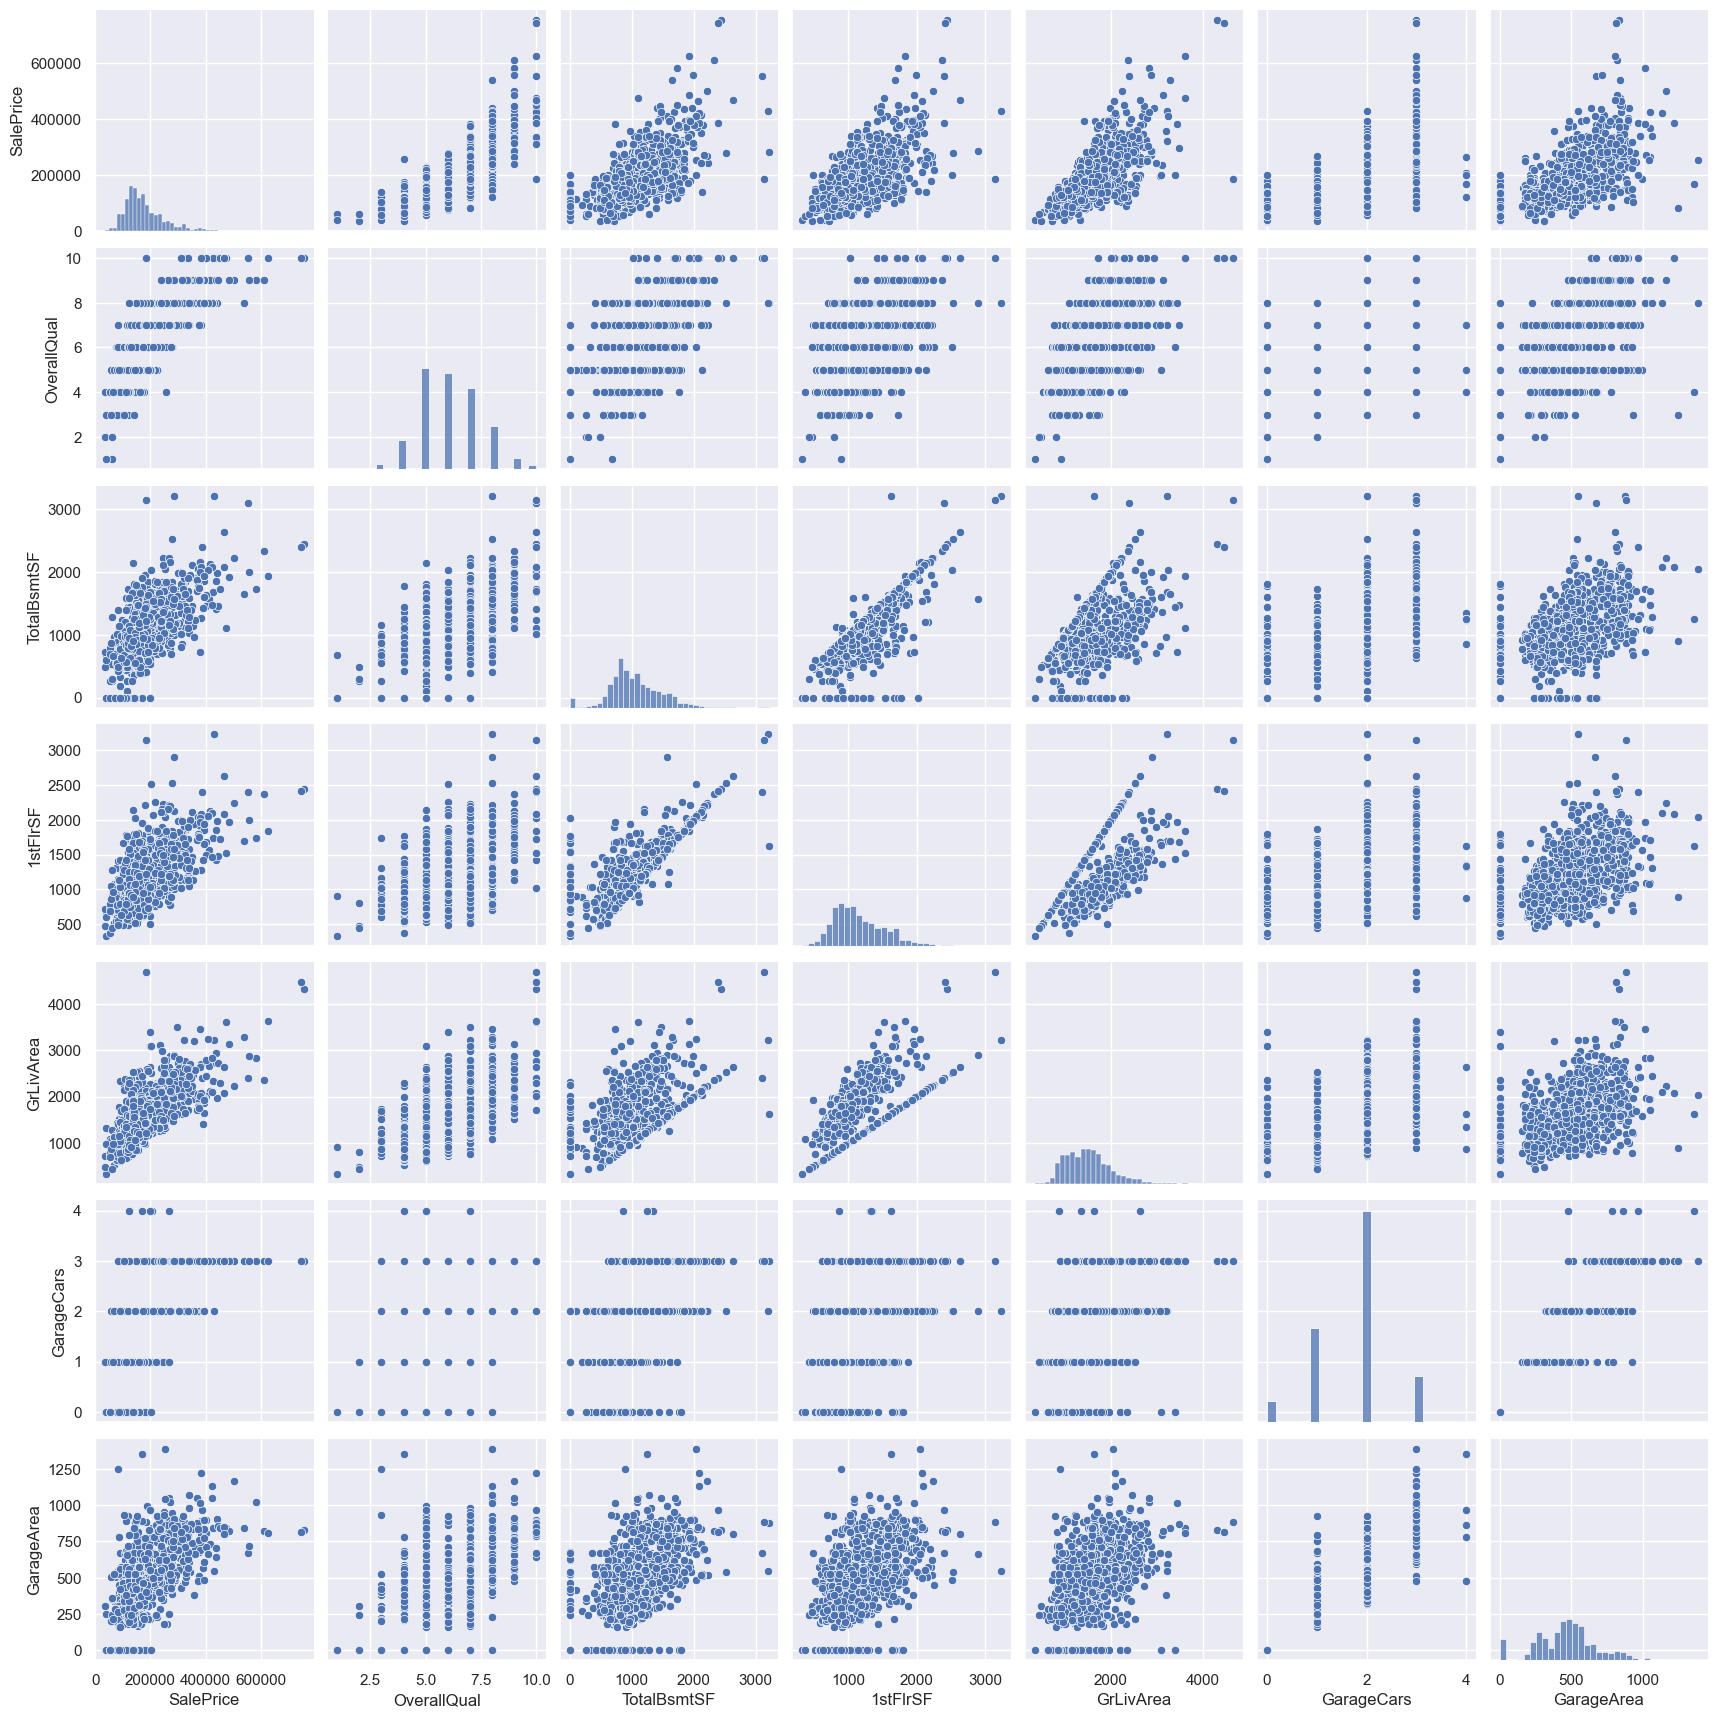

In [41]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea']
sns.pairplot(train[cols], size = 2.5)
plt.show();

train['SalePrice']とtrain['OverallQual']の関係性をOverallQualのカテゴリごとで確認する

OverallQual: Rates the overall material and finish of the house（全体的な素材と仕上げの品質。）

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

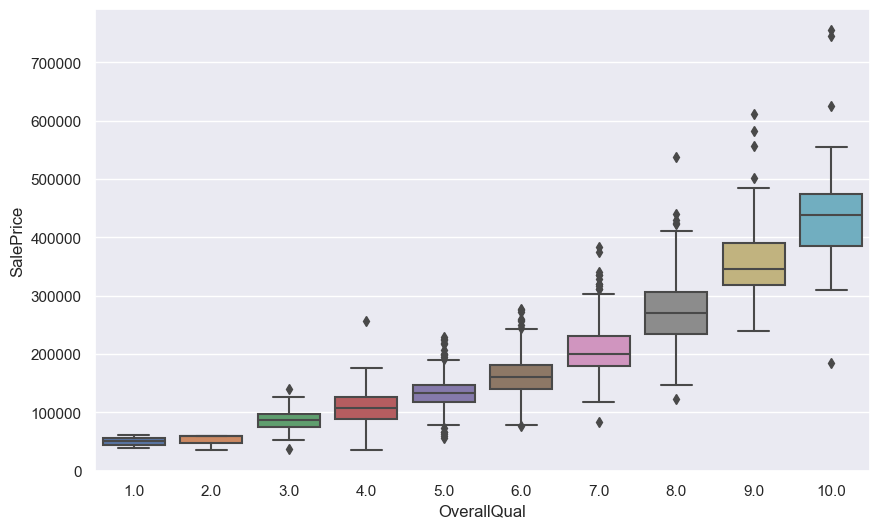

In [42]:
datas = pd.concat([train['SalePrice'], train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=datas);

train['SalePrice']とtrain['TotalBsmtSF']の関係性をTotalBsmtSF確認する

TotalBsmtSF: Total square feet of basement area（地下室の総面積（平方フィート））

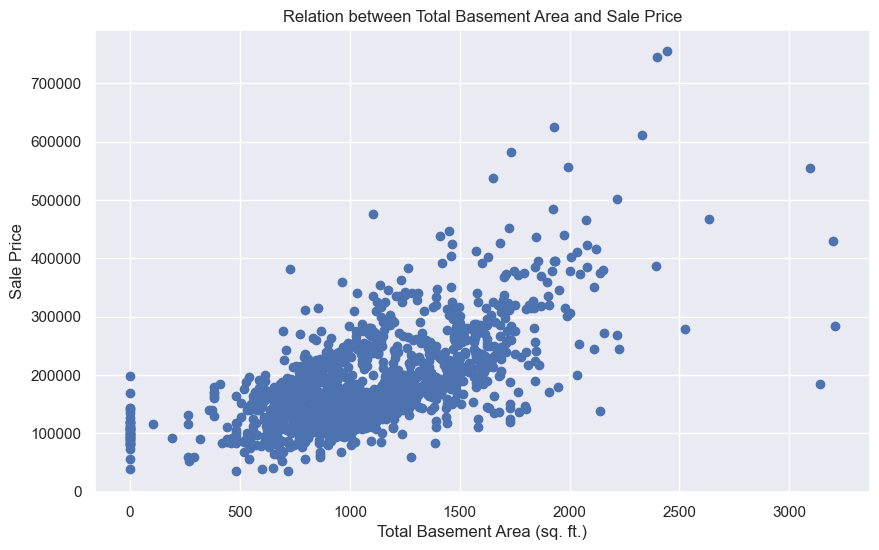

In [43]:
plt.figure(figsize=(10, 6))  # グラフのサイズを設定

plt.scatter(train['TotalBsmtSF'], train['SalePrice'])  # 散布図をプロット
plt.title('Relation between Total Basement Area and Sale Price')  # グラフのタイトル
plt.xlabel('Total Basement Area (sq. ft.)')  # x軸のラベル
plt.ylabel('Sale Price')  # y軸のラベル

plt.show()  # グラフを表示

In [44]:
# test データフレーム内の "TotalBsmtSF" 列の欠損値の数を数える
missing_count = test["TotalBsmtSF"].isnull().sum()

print(f"Number of missing values in 'TotalBsmtSF' column: {missing_count}")

# 中央値を計算
median_value = test["TotalBsmtSF"].median()

# 欠損値を中央値で補完
test["TotalBsmtSF"].fillna(median_value, inplace=True)

# 補完後の欠損値の数を確認
missing_count_after = test["TotalBsmtSF"].isnull().sum()

print(f"Number of missing values in 'TotalBsmtSF' column after imputation: {missing_count_after}")

Number of missing values in 'TotalBsmtSF' column: 1
Number of missing values in 'TotalBsmtSF' column after imputation: 0


- - -
Linear法でモデリング
- - -

In [45]:
# 説明変数と目的変数を指定

# 説明変数のデータを作る
X = train.loc[:, ['OverallQual', 'GrLivArea']].values

# 目的変数のデータを作る
y = train['SalePrice'].values

In [46]:
# 重回帰のモデリング
# モデルのインスタンスを作る
reg2 = linear_model.LinearRegression()
# データをインプットする
reg2.fit(X,y)

X1 = test.loc[:, ['OverallQual', 'GrLivArea']].values

print('回帰係数は',reg2.coef_,'\n') #アンダーバー(_)に注意、忘れないように！
print('切片は',reg2.intercept_)

回帰係数は [32316.9755552     60.81901019] 

切片は -108133.15294990907


In [47]:
# サンプルデータに予測結果をセット
sample.SalePrice = reg2.predict(X1)

# Google colab環境であるか判定
if 'google.colab' in sys.modules:
    # マイドライブ内のデータに書き込むpathに設定
    sample.to_csv("/content/drive/MyDrive/プログラミング、AI/Datasience/Kaggle, signate/Kaggle/house_price/prediction_linear.csv", index=False)
else:
    # サンプルデータをCSVファイルに保存
    sample.to_csv('prediction_linear.csv', index=False)

- - -
k近傍法（k-Nearest Neighbors, k-NN）でモデリング
- - -

In [48]:
from sklearn.neighbors import KNeighborsClassifier

# 「train」の目的変数と説明変数の値を取得
y = train['SalePrice'].values
X = train.loc[:, ['OverallQual', 'GrLivArea']].values

# k近傍法の作成
knn = KNeighborsClassifier(n_neighbors=15)
knn = knn.fit(X, y)

# 「test」の説明変数の値を取得
X1 = test.loc[:, ['OverallQual', 'GrLivArea']].values

# 「test」の説明変数を使ってk-NNモデルで予測
sample.SalePrice = knn.predict(X1)

# Google colab環境であるか判定
if 'google.colab' in sys.modules:
    # マイドライブ内のデータに書き込むpathに設定
    sample.to_csv("/content/drive/MyDrive/プログラミング、AI/Datasience/Kaggle, signate/Kaggle/house_price/prediction_kNN_k15.csv", index=False)
else:
    # サンプルデータをCSVファイルに保存
    sample.to_csv('prediction_kNN_k15.csv', index=False)

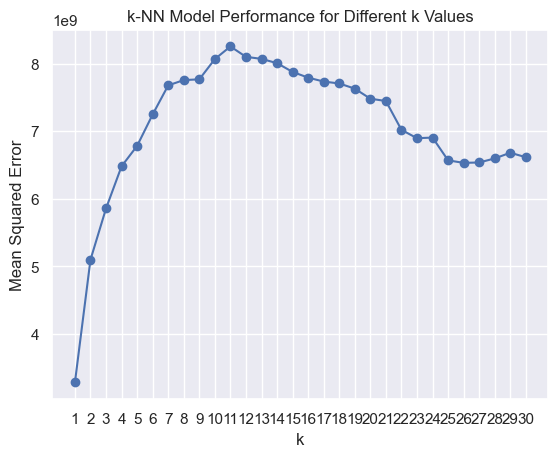

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error

# データの準備
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 異なる k 値に対して k-NN モデルをトレーニングし、精度を評価
k_values = range(1, 31)  # k の値の範囲を指定
mse_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    mse_scores.append(mse)

# 結果をグラフ化
plt.plot(k_values, mse_scores, marker='o')
plt.xlabel('k')
plt.ylabel('Mean Squared Error')
plt.title('k-NN Model Performance for Different k Values')
plt.xticks(k_values)
plt.grid(True)
plt.show()


- - -
決定木でモデリング
- - -

In [50]:
# 「train」の目的変数と説明変数の値を取得
y = train['SalePrice'].values
X = train.loc[:, ['OverallQual', 'GrLivArea']].values

# 決定木の作成
my_tree_one = tree.DecisionTreeClassifier(max_depth=4)
my_tree_one = my_tree_one.fit(X, y)

# 「test」の説明変数の値を取得
X1 = test.loc[:, ['OverallQual', 'GrLivArea']].values

# 「test」の説明変数を使って「my_tree_one」のモデルで予測
sample.SalePrice = my_tree_one.predict(X1)

# Google colab環境であるか判定
if 'google.colab' in sys.modules:
    # マイドライブ内のデータに書き込むpathに設定
    sample.to_csv("/content/drive/MyDrive/プログラミング、AI/Datasience/Kaggle, signate/Kaggle/house_price/prediction_tree_depth4.csv", index=False)
else:
    # サンプルデータをCSVファイルに保存
    sample.to_csv('prediction_kNN_tree_depth4.csv', index=False)

# 決定木をグラフィカルに表示
plt.figure(figsize=(300, 100))
tree.plot_tree(my_tree_one, fontsize=10, filled=True, feature_names=['OverallQual', 'GrLivArea'])
plt.show()

- - -
SVMでモデリング
- - -

In [51]:
# SVMの作成
from sklearn.svm import SVC

# 「train」の目的変数と説明変数の値を取得
y = train['SalePrice'].values
X = train.loc[:, ['OverallQual', 'GrLivArea']].values

#モデルの構築（線形SVM，RBFカーネル）
#model1 = SVC(kernel='linear')
model2 = SVC(kernel='rbf')

#model1.fit(X, y)
model2.fit(X, y)

#svm_classifier = SVC(kernel='rbf', gamma=0.01)  # Linear kernel with C=1.0, you can experiment with different kernels and parameters
#svm_classifier.fit(X, y)

# 「test」の説明変数の値を取得
X1 = test.loc[:, ['OverallQual', 'GrLivArea']].values

# 「test」の説明変数を使ってSVMモデルで予測
sample.SalePrice = model2.predict(X1)

# Google colab環境であるか判定
if 'google.colab' in sys.modules:
    # マイドライブ内のデータに書き込むpathに設定
    sample.to_csv("/content/drive/MyDrive/プログラミング、AI/Datasience/Kaggle, signate/Kaggle/house_price/prediction_svm_model2.csv", index=False)
else:
    # サンプルデータをCSVファイルに保存
    sample.to_csv('prediction_svm_model2.csv', index=False)

In [52]:
"""
#分類結果を図示する
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

fig = plt.figure(figsize=(8,5))
plot_decision_regions(X, y, clf=model1)
plt.show()
"""

'\n#分類結果を図示する\nimport matplotlib.pyplot as plt\nfrom mlxtend.plotting import plot_decision_regions\n\nfig = plt.figure(figsize=(8,5))\nplot_decision_regions(X, y, clf=model1)\nplt.show()\n'

In [53]:
"""
#分類結果を図示する
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

fig = plt.figure(figsize=(8,5))
plot_decision_regions(X, y, clf=model2)
plt.show()
"""

'\n#分類結果を図示する\nimport matplotlib.pyplot as plt\nfrom mlxtend.plotting import plot_decision_regions\n\nfig = plt.figure(figsize=(8,5))\nplot_decision_regions(X, y, clf=model2)\nplt.show()\n'

- - -
ランダムフォレスト(randomforest)でモデリング
- - -

In [54]:
# 「train」の目的変数と説明変数の値を取得
y = train['SalePrice'].values
X = train.loc[:, ['OverallQual', 'GrLivArea']].values

# 決定木の作成
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model=model.fit(X, y)

# 「test」の説明変数の値を取得
X1 = test.loc[:, ['OverallQual', 'GrLivArea']].values

# 「test」の説明変数を使って「my_tree_one」のモデルで予測
sample.SalePrice = model.predict(X1)

# Google colab環境であるか判定
if 'google.colab' in sys.modules:
    # マイドライブ内のデータに書き込むpathに設定
    sample.to_csv("/content/drive/MyDrive/プログラミング、AI/Datasience/Kaggle, signate/Kaggle/house_price/prediction_randomforest.csv", index=False)
else:
    # サンプルデータをCSVファイルに保存
    sample.to_csv('prediction_randomforest.csv', index=False)

- - -
ブースティングでモデリング
- - -

In [55]:
# 「train」の目的変数と説明変数の値を取得
y = train['SalePrice'].values
X = train.loc[:, ['OverallQual', 'GrLivArea']].values

# ブースティングの作成
boosting = GradientBoostingClassifier(n_estimators=5, max_depth=5, random_state=42) #n_estimators=100
boosting = boosting.fit(X, y)

# 「test」の説明変数の値を取得
X1 = test.loc[:, ['OverallQual', 'GrLivArea']].values

# 「test」の説明変数を使ってブースティングモデルで予測
sample.SalePrice = boosting.predict(X1)

# Google colab環境であるか判定
if 'google.colab' in sys.modules:
    # マイドライブ内のデータに書き込むpathに設定
    sample.to_csv("/content/drive/MyDrive/プログラミング、AI/Datasience/Kaggle_signate/Kaggle/house_price/prediction_boosting.csv", index=False)
else:
    sample.to_csv("prediction_boosting.csv", index=None)

- - -
XgBoostでモデリング
- - -

In [56]:
# XGBoostのデータセットに変換
dtrain = xgb.DMatrix(X, label=y)

# パラメータの設定
params = {
    'objective': 'reg:squarederror',  # 回帰問題の場合
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100
}

# ブースティングの実行
num_rounds = 100  # ラウンド数（決定木の数）
bst = xgb.train(params, dtrain, num_rounds)

# 「test」の説明変数の値を取得
X1 = test.loc[:, ['OverallQual', 'GrLivArea']].values

# XGBoostのデータセットに変換
dtest = xgb.DMatrix(X1)

# 「test」の説明変数を使ってブースティングモデルで予測
sample.SalePrice = bst.predict(dtest)

# Google colab環境であるか判定
if 'google.colab' in sys.modules:
    # マイドライブ内のデータに書き込むpathに設定
    sample.to_csv("/content/drive/MyDrive/プログラミング、AI/Datasience/Kaggle_signate/Kaggle/house_price/prediction_xgboost.csv", index=False)
else:
    sample.to_csv("prediction_xgboost.csv", index=None)

[16:53:22] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.



- - -
LightGBM
- - -

In [57]:
# LightGBMのデータセットに変換
dtrain = lgb.Dataset(X, label=y)

# パラメータの設定
params = {
    'max_depth': 3,      # 各決定木の深さ
    'learning_rate': 0.1, # 学習率
    'objective': 'binary',  # 2値分類問題
    'metric': 'binary_logloss'  # ロジスティック損失を使用してモデルの評価
}

# ブースティングの実行
num_rounds = 100  # ラウンド数（決定木の数）
bst = lgb.train(params, dtrain, num_rounds)

# 「test」の説明変数の値を取得
X1 = test.loc[:, ['OverallQual', 'GrLivArea']].values

# LightGBMのデータセットに変換
dtest = lgb.Dataset(X1)

# 「test」の説明変数を使ってブースティングモデルで予測
sample.SalePrice = bst.predict(X1)

# Google colab環境であるか判定
if 'google.colab' in sys.modules:
    # マイドライブ内のデータに書き込むpathに設定
    sample.to_csv("/content/drive/MyDrive/プログラミング、AI/Datasience/Kaggle_signate/signate/従業員の離職予測/submit/prediction_lightgbm.csv", index=False)
else:
    sample.to_csv("prediction_lightgbm.csv", index=None)

[LightGBM] [Warning] Contains only one class
[LightGBM] [Info] Number of positive: 1455, number of negative: 0
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000351 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 265
[LightGBM] [Info] Number of data points in the train set: 1455, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=1.000000 -> initscore=34.539576
[LightGBM] [Info] Start training from score 34.539576
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because ther

- - -
ロジスティック回帰
- - -

In [58]:
# 「train」の目的変数と説明変数の値を取得
y = train['SalePrice'].values
X = train.loc[:, ['OverallQual', 'GrLivArea']].values

# ロジスティック回帰モデルの学習（分類問題）
log_reg = LogisticRegression()
log_reg.fit(X, y)

# 「test」の説明変数の値を取得
X1 = test.loc[:, ['OverallQual', 'GrLivArea']].values

# 「test」の説明変数を使って予測
sample.SalePrice = log_reg.predict(X1)

# Google colab環境であるか判定
if 'google.colab' in sys.modules:
    # マイドライブ内のデータに書き込むpathに設定
    sample.to_csv("/content/drive/MyDrive/プログラミング、AI/Datasience/Kaggle, signate/signate/従業員の離職予測/submit/my_logistic.csv", index=False)
else:
    sample.to_csv("prediction_logistic.csv", index=False)

- - -
MLPでモデリング(+PCA:主成分分析)
- - -

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

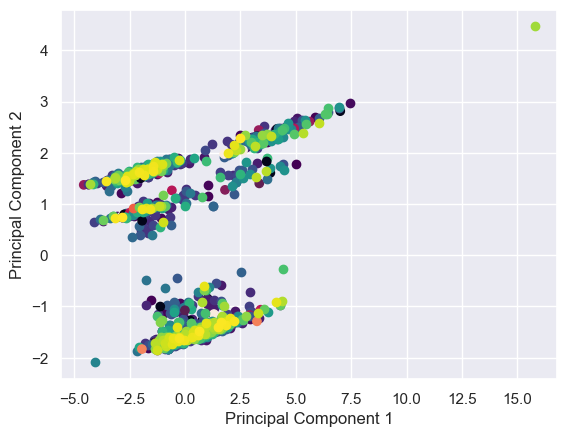

In [59]:
features = ['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea']
X = pd.get_dummies(train[features])
feature_original = pd.get_dummies(test[features])
#print("feature_original:", len(feature_original))
y = train['SalePrice'].values

X_scaled = (feature_original-feature_original.mean())/feature_original.std() #データの標準化
#print("X_scaled:", len(X_scaled))

# PCAのインスタンスを作成
pca = PCA(n_components=2)  # n_componentsは主成分の数を指定（ここでは2つの主成分を抽出）

# データをPCAに適合させる
transformed_data = pca.fit_transform(X_scaled)

uniquey = pd.unique(y)
df_transformed = pd.DataFrame(data=transformed_data, columns=["Principal Component 1", "Principal Component 2"])
#print("df_transformed:",len(df_transformed))
df_transformed_value = df_transformed.values
#print(df_transformed_value)

# y も DataFrame に変換
df_y = pd.DataFrame(data=y, columns=['SalePrice'])

# transformed_data と y を結合して DataFrame を作成
df_combined = pd.concat([df_transformed, df_y], axis=1)
#print("df_combined:",len(df_combined))

# matplotlib の viridis カラーマップを利用して y のユニークな値ごとに色を生成
cmap = plt.cm.get_cmap('viridis', len(uniquey))

# 各クラス（Attritionが0または1）ごとに散布図を描画
for i, yi in enumerate(uniquey):
    data_subset = df_combined[df_combined['SalePrice'] == yi]
    plt.scatter(data_subset["Principal Component 1"], data_subset["Principal Component 2"], c=cmap(i), label=f'SalePrice {yi}')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
#plt.legend()
plt.show()

# 主成分の寄与率や固有ベクトルなどを取得する場合
#print("explained_variance_ratio",pca.explained_variance_ratio_)
#print("components", pca.components_)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

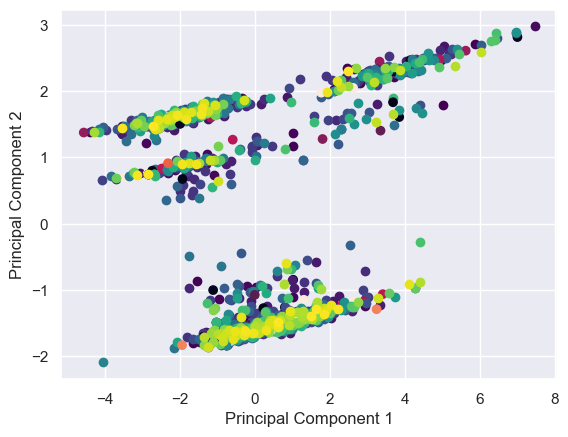

In [60]:
# Remove outliers where "Principal Component 1" is greater than 15
df_combined = df_combined[df_combined['Principal Component 1'] <= 15]

# matplotlib の viridis カラーマップを利用して y のユニークな値ごとに色を生成
cmap = plt.cm.get_cmap('viridis', len(uniquey))

# 各クラス（Attritionが0または1）ごとに散布図を描画
for i, yi in enumerate(uniquey):
    data_subset = df_combined[df_combined['SalePrice'] == yi]
    plt.scatter(data_subset["Principal Component 1"], data_subset["Principal Component 2"], c=cmap(i), label=f'SalePrice {yi}')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
#plt.legend()
plt.show()

In [61]:
df_combined.head()

Principal Component 1  Principal Component 2  SalePrice
0                  -1.28                   1.82  208500.00
1                  -0.71                   1.81  181500.00
2                  -0.04                  -1.56  223500.00
3                  -0.09                  -1.63  140000.00
4                   1.03                  -1.48  250000.00

In [72]:
def relu(v):
    x = np.maximum(0, v)
    return x

def leaky_relu(x, alpha=0.01):
    return np.maximum(alpha * x, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def MSE(t, y):
    mse = np.mean(np.square(t - y))
    return mse


# データの分割
X_train, X_test, T_train, T_test = train_test_split(df_combined, df_combined['SalePrice'], test_size=0.5, random_state=42)

# x_trainの特定のカラム名のデータだけ抽出
feature = ["Principal Component 1", "Principal Component 2"]
x_train = X_train[feature].values

# x_testの特定のカラム名のデータだけ抽出
x_test = X_test[feature].values

# t_trainのデータだけ抽出
t_train = T_train.values

# t_testのデータだけ抽出
t_test = T_test.values

# 分割後のデータの確認
print(x_train.shape)
print(x_test.shape)
print(t_train.shape)
print(t_test.shape)

(729, 2)
(729, 2)
(729,)
(729,)


In [76]:
# 回帰モデル
class MLP_regressor():
    '''
    多層パーセプトロン Multi Layered Perceptron
    構成: [入力層, 第1層, 第2層, 第3層, 出力層]
    ノード数: [2, 50, 50, 10, 1]
    '''

    def __init__(self):
        '''
        コンストラクタ
        パラメータ（重みw, バイアスb）の定義
        第1層重み self.w1: [2, 50] 平均0, 標準偏差0.1の乱数
        第2層重み self.w2: [50, 50] 平均0, 標準偏差0.1の乱数
        第3層重み self.w3: [50, 10] 平均0, 標準偏差0.1の乱数
        第4層重み self.w4: [10, 1] 平均0, 標準偏差0.1の乱数

        第1層バイアス self.b1: [50] 要素が全て0
        第2層バイアス self.b2: [50] 要素が全て0
        第3層バイアス self.b3: [10] 要素が全て0
        第4層バイアス self.b4: [1] 要素が全て0
        '''

        # 重みの定義
        self.w1 = np.random.randn(2, 50) * 0.1
        self.w2 = np.random.randn(50, 50) * 0.1
        self.w3 = np.random.randn(50, 10) * 0.1
        self.w4 = np.random.randn(10, 1) * 0.1

        # バイアスの定義
        self.b1 = np.zeros(50, dtype=float)
        self.b2 = np.zeros(50, dtype=float)
        self.b3 = np.zeros(10, dtype=float)
        self.b4 = np.zeros(1, dtype=float)

    def forward(self, x):
        '''
        順伝播
        入力 x: [N, 2]
        入力層 self.layer0: [N, 2]
        第1層 self.layer1: [N, 50]
        第2層 self.layer2: [N, 50]
        第3層 self.layer3: [N, 10]
        出力層 self.out: [N, 1]
        '''

        self.layer0 = x
        self.layer1 = relu(np.dot(self.layer0, self.w1) + self.b1)
        self.layer2 = relu(np.dot(self.layer1, self.w2) + self.b2)
        self.layer3 = relu(np.dot(self.layer2, self.w3) + self.b3)
        self.out = np.dot(self.layer3, self.w4) + self.b4
        return self.out

        """
        self.layer0 = x
        self.layer1 = sigmoid(np.dot(self.layer0, self.w1) + self.b1)
        self.layer2 = sigmoid(np.dot(self.layer1, self.w2) + self.b2)
        self.layer3 = sigmoid(np.dot(self.layer2, self.w3) + self.b3)
        self.out = np.dot(self.layer3, self.w4) + self.b4
        return self.out
        """

        """
        self.layer0 = x
        self.layer1 = leaky_relu(np.dot(self.layer0, self.w1) + self.b1)
        self.layer2 = leaky_relu(np.dot(self.layer1, self.w2) + self.b2)
        self.layer3 = leaky_relu(np.dot(self.layer2, self.w3) + self.b3)
        self.out = np.dot(self.layer3, self.w4) + self.b4
        return self.out
        """

    def backward(self, t, y):
        '''
        逆伝播
        真の値 t: [N, 1]
        予測値 y: [N, 1]

        出力層誤差 delta4: [N, 1]
        第3層誤差 delta3: [N, 10]
        第2層誤差 delta2: [N, 50]
        第1層誤差 delta1: [N, 50]

        第4層b勾配 dedb4: [N, 1]
        第3層b勾配 dedb3: [N, 10]
        第2層b勾配 dedb2: [N, 50]
        第1層b勾配 dedb1: [N, 50]

        第4層w勾配 dedw4: [N, 10, 1]
        第3層w勾配 dedw3: [N, 50, 10]
        第2層w勾配 dedw2: [N, 50, 50]
        第1層w勾配 dedw1: [N, 2, 50]
        '''

        # 出力層の誤差デルタは二乗誤差の微分
        #delta4 = -2 * (t - y)
        delta4 = -2 * (t_train.reshape(-1, 1) - y) # delta4の形状: (N, 1)
        # 誤差逆伝播
        delta3 = np.dot(delta4, self.w4.transpose()) # delta3の形状: (N, 10)   #transpose()関数は転置をする
        delta2 = np.dot(delta3 * np.where(self.layer3 > 0, 1., 0.), self.w3.transpose())      #np.whereは、指定した条件がTrueの場合は第二引数の値を、条件がFalseの場合は第三引数の値を選択
        delta1 = np.dot(delta2 * np.where(self.layer2 > 0, 1., 0.), self.w2.transpose())

        # バイアスbのコスト関数eに対する勾配
        self.dedb4 = np.mean(delta4, axis=0)
        self.dedb3 = np.mean(delta3 * (self.layer3 > 0), axis=0)    #誤差の平均を勾配としている
        self.dedb2 = np.mean(delta2 * (self.layer2 > 0), axis=0)
        self.dedb1 = np.mean(delta1 * (self.layer1 > 0), axis=0)

        # 重みwのコスト関数eに対する勾配
        self.dedw4 = np.dot(self.layer3.T, delta4) / delta4.shape[0]
        self.dedw3 = np.dot(self.layer2.T, delta3 * (self.layer3 > 0)) / delta3.shape[0] #delta1.shape[0]を使用して行列の要素数（サンプル数）で割ることで、平均値を計算することができる
        self.dedw2 = np.dot(self.layer1.T, delta2 * (self.layer2 > 0)) / delta2.shape[0]
        self.dedw1 = np.dot(self.layer0.T, delta1 * (self.layer1 > 0)) / delta1.shape[0]

    def optimize_GradientDecent(self, lr):
        '''
        勾配降下法によるパラメータの更新
        '''
        self.b1 -= lr * self.dedb1
        self.b2 -= lr * self.dedb2
        self.b3 -= lr * self.dedb3
        self.b4 -= lr * self.dedb4

        self.w1 -= lr * self.dedw1
        self.w2 -= lr * self.dedw2
        self.w3 -= lr * self.dedw3
        self.w4 -= lr * self.dedw4

EPOCH  1  | TRAIN LOSS  nan  | TEST LOSS  nan
EPOCH  2  | TRAIN LOSS  nan  | TEST LOSS  nan
EPOCH  3  | TRAIN LOSS  nan  | TEST LOSS  nan
EPOCH  4  | TRAIN LOSS  nan  | TEST LOSS  nan
EPOCH  5  | TRAIN LOSS  nan  | TEST LOSS  nan
EPOCH  6  | TRAIN LOSS  nan  | TEST LOSS  nan
EPOCH  7  | TRAIN LOSS  nan  | TEST LOSS  nan
EPOCH  8  | TRAIN LOSS  nan  | TEST LOSS  nan
EPOCH  9  | TRAIN LOSS  nan  | TEST LOSS  nan
EPOCH  10  | TRAIN LOSS  nan  | TEST LOSS  nan
EPOCH  11  | TRAIN LOSS  nan  | TEST LOSS  nan
EPOCH  12  | TRAIN LOSS  nan  | TEST LOSS  nan
EPOCH  13  | TRAIN LOSS  nan  | TEST LOSS  nan
EPOCH  14  | TRAIN LOSS  nan  | TEST LOSS  nan
EPOCH  15  | TRAIN LOSS  nan  | TEST LOSS  nan
EPOCH  16  | TRAIN LOSS  nan  | TEST LOSS  nan
EPOCH  17  | TRAIN LOSS  nan  | TEST LOSS  nan
EPOCH  18  | TRAIN LOSS  nan  | TEST LOSS  nan
EPOCH  19  | TRAIN LOSS  nan  | TEST LOSS  nan
EPOCH  20  | TRAIN LOSS  nan  | TEST LOSS  nan
EPOCH  21  | TRAIN LOSS  nan  | TEST LOSS  nan
EPOCH  22  | TRAIN LOS

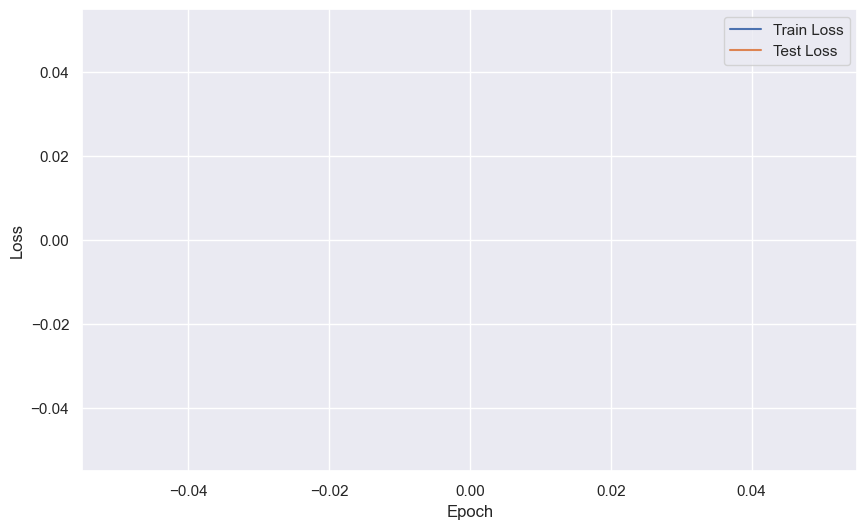

In [77]:
# モデルの定義
model = MLP_regressor()

# 学習率
lr = 0.0001 #学習率0.01だと大きすぎてnanになる
# 学習エポック数
n_epoch = 500

# 損失を記録するリストを作成
train_losses = []
test_losses = []

# n_epoch繰り返す
for n in range(n_epoch):
    # 訓練
    # Chapter02範囲外のため、ミニバッチは使用しない
    y = model.forward(x_train)
    train_loss = MSE(t_train, y)
    model.backward(t_train, y)
    model.optimize_GradientDecent(lr)
    train_losses.append(train_loss)

    # テスト
    y = model.forward(x_test)
    test_loss = MSE(t_test, y)
    test_losses.append(test_loss)

    print('EPOCH ', n + 1, ' | TRAIN LOSS ', train_loss, ' | TEST LOSS ', test_loss)

# 損失をグラフにプロット
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_epoch + 1), train_losses, label='Train Loss')
plt.plot(range(1, n_epoch + 1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [65]:
print(X_test.shape)
print(X_test.head())

(729, 3)
      Principal Component 1  Principal Component 2  SalePrice
1321                  -2.38                   0.35   82500.00
836                    2.18                   1.57  153500.00
413                   -1.69                   0.43  115000.00
522                    1.43                  -1.39  159000.00
1035                   2.75                  -1.18  315500.00


In [66]:
# テストデータを予測
y_pred = model.forward(X_test[feature])

# 予測結果を1次元に変換
y_pred = y_pred.flatten()

# 「test」の説明変数を使ってブースティングモデルで予測
sample.SalePrice = bst.predict(X1)

# Google colab環境であるか判定
if 'google.colab' in sys.modules:
    # マイドライブ内のデータに書き込むpathに設定
    sample.to_csv("/content/drive/MyDrive/プログラミング、AI/Datasience/Kaggle_signate/signate/従業員の離職予測/submit/prediction_MLP.csv", index=False)
else:
    sample.to_csv("prediction_MLP.csv", index=None)

説明変数・目的変数をそれぞれ標準化して違いを確認する
Standardize/Normalize

標準化：特徴量の平均を0にし、標準偏差を1にする処理

　　　　(特徴量の尺度を統一し、分析やモデリングの際の安定性や収束性を向上させることができる)

In [78]:
saleprice_scaled = StandardScaler().fit_transform(train['SalePrice'][:,np.newaxis]);
print(saleprice_scaled)

[[ 0.3464163 ]
 [ 0.0068855 ]
 [ 0.53504453]
 ...
 [-0.07485339]
 [ 0.36527913]
 [ 1.07577876]]


(Japanese)
- - - - 
MSSubClass: 建物のクラスを示すコード。

       20	1階建て 1946年以降のすべてのスタイル
       30	1階建て 1945年以前
       40	1階建て 屋根裏が仕上げられたすべての年代
       45	1.5階建て - 未完成のすべての年代
       50	1.5階建て 仕上げられたすべての年代
       60	2階建て 1946年以降
       70	2階建て 1945年以前
       75	2.5階建て すべての年代
       80	スプリットまたはマルチレベル
       85	スプリットフォワー
       90	デュプレックス - すべてのスタイルと年代
       120	1階建て PUD（プランド・ユニット・デベロップメント） - 1946年以降
       150	1.5階建て PUD - すべての年代
       160	2階建て PUD - 1946年以降
       180	PUD - マルチレベル - スプリットレベル/フォワーを含む
       190	2世帯住宅変換 - すべてのスタイルと年代

MSZoning: 地域の区分を示すコード。

       A     農業地域
       C     商業地域
       FV    浮動する村の住宅地域
       I     工業地域
       RH    住宅地域（高密度）
       RL    住宅地域（低密度）
       RP    住宅地域（低密度の公園地域）
       RM    住宅地域（中密度）


LotFrontage: 敷地の道路に面した幅（フィート）。

LotArea: 敷地の面積（平方フィート）。

Street: 物件へのアクセスの道路のタイプ

       Grvl	砂利道	
       Pave	舗装道路
        
Alley: 物件への裏道のタイプ

       Grvl	砂利道
       Pave	舗装道路
       NA 	裏道アクセスなし
		
LotShape: 物件の一般的な形状

       Reg	正規（Regular）	
       IR1	わずかに不規則（Slightly irregular）
       IR2	中程度に不規則（Moderately Irregular）
       IR3	不規則（Irregular）
       
LandContour: 物件の平坦度

       Lvl	ほぼ平坦（Near Flat/Level）	
       Bnk	傾斜地 - 通りから建物まで急激な上昇
       HLS	丘陵地 - 横方向に大きな傾斜
       Low	低地
		
Utilities: 利用可能な公共サービス

       AllPub	すべての公共サービス（電気、ガス、水道、下水道）	
       NoSewr	電気、ガス、水道のみ（浄化槽）
       NoSeWa	電気とガスのみ
       ELO	電気のみ	
	
LotConfig: 敷地の配置

       Inside	内部の敷地
       Corner	角地
       CulDSac	カルデサック（袋小路）
       FR2	敷地の2つの側面に道路がある
       FR3	敷地の3つの側面に道路がある
	
LandSlope: 物件の傾斜度
		
       Gtl	緩やかな傾斜
       Mod	中程度の傾斜	
       Sev	急な傾斜
	
Neighborhood: エイムズ市内の物理的な場所

       Blmngtn	ブルーミントンハイツ
       Blueste	ブルーステム
       BrDale	ブライアーデール
       BrkSide	ブルックサイド
       ClearCr	クリアクリーク
       CollgCr	カレッジクリーク
       Crawfor	クロフォード
       Edwards	エドワーズ
       Gilbert	ギルバート
       IDOTRR	アイオワDOTおよび鉄道
       MeadowV	メドウビレッジ
       Mitchel	ミッチェル
       Names	ノースエイムズ
       NoRidge	ノースリッジ
       NPkVill	ノースパークビラ
       NridgHt	ノースリッジハイツ
       NWAmes	ノースウエストエイムズ
       OldTown	オールドタウン
       SWISU	アイオワステート大学の南と西
       Sawyer	ソーヤー
       SawyerW	ソーヤーウエスト
       Somerst	サマーセット
       StoneBr	ストーンブルック
       Timber	ティンバーランド
       Veenker	ヴィンカー
			
Condition1: 各種条件への近接性
	
       Artery	幹線道路に隣接
       Feedr	補助道路に隣接	
       Norm	通常	
       RRNn	南北鉄道から200フィート以内
       RRAn	南北鉄道に隣接
       PosN	近くのポジティブな施設（公園、緑地など）に近い
       PosA	ポジティブな施設に隣接
       RRNe	東西鉄道から200フィート以内
       RRAe	東西鉄道に隣接
	
Condition2: 各種条件への近接性（複数の条件が存在する場合）
		
       Artery	幹線道路に隣接
       Feedr	補助道路に隣接	
       Norm	通常	
       RRNn	南北鉄道から200フィート以内
       RRAn	南北鉄道に隣接
       PosN	近くのポジティブな施設に近い
       PosA	ポジティブな施設に隣接
       RRNe	東西鉄道から200フィート以内
       RRAe	東西鉄道に隣接
	
BldgType: 住居のタイプ
		
       1Fam	単一世帯用住宅	
       2FmCon	2世帯用住宅への変換（元々は単一世帯用住宅として建てられた）
       Duplx	二重住宅（ダブルエックス）
       TwnhsE	タウンハウスエンドユニット
       TwnhsI	タウンハウスインサイドユニット

ExterCond: 外装素材のコンディション。

Foundation: 基礎の種類。

BsmtQual: 地下室の高さを評価

       Ex	優れている（100インチ以上）	
       Gd	良い（90-99インチ）
       TA	典型的（80-89インチ）
       Fa	平均以下（70-79インチ）
       Po	悪い（70インチ未満）
       NA	地下室なし
		
BsmtCond: 地下室の全体的な状態を評価

       Ex	優れている
       Gd	良い
       TA	典型的 - 軽微な湿気が許容される
       Fa	平均以下 - 湿気や一部のクラックや沈みがある
       Po	悪い - 重度のクラック、沈下、または湿気
       NA	地下室なし
	

BsmtExposure: 地下室のウォークアウトまたはガーデンレベル壁。(地下室の一部が外部に露出しているか、外部にアクセスできるかどうか)

       Gd	良好な露出
       Av	平均的な露出（スプリットレベルやフォワなど、通常は平均以上のスコア）
       Mn	最小限の露出
       No	露出なし
       NA	地下室なし
	
BsmtFinType1: 地下室の完成したエリアの品質。

       GLQ	上質なリビングエリア
       ALQ	平均のリビングエリア
       BLQ	平均以下のリビングエリア	
       Rec	平均のリクリエーションルーム
       LwQ	低品質
       Unf	未完成
       NA	地下室なし
		
BsmtFinSF1: タイプ1の仕上げ済み平方フィート

BsmtFinType2: 地下室の仕上げエリアの品質（存在しない場合はNA）。

       GLQ	上質なリビングエリア
       ALQ	平均のリビングエリア
       BLQ	平均以下のリビングエリア	
       Rec	平均のリクリエーションルーム
       LwQ	低品質
       Unf	未完成
       NA	地下室なし

BsmtFinSF2: タイプ2の仕上げ済み平方フィート

BsmtUnfSF: 未完成の地下室の平方フィート

HouseStyle: 住宅のスタイル。

OverallQual: 全体的な素材と仕上げの品質。

OverallCond: 全体的なコンディション評価。

YearBuilt: 建設年。

YearRemodAdd: 改装された年。

RoofStyle: 屋根のスタイル。

RoofMatl: 屋根材の種類。

Exterior1st: 外装材1。

Exterior2nd: 外装材2。

MasVnrType: メイソンリーベニア（住宅の外壁に使用される石造りやレンガなどの装飾的な素材）のタイプ。

MasVnrArea: メイソンリーベニア（住宅の外壁に使用される石造りやレンガなどの装飾的な素材）の面積（平方フィート）。

ExterQual: 外装素材の品質。

BsmtFinSF2: 地下室のタイプ2の完成した平方フィート。

BsmtUnfSF: 地下室の未完成エリアの平方フィート。

TotalBsmtSF: 地下室の総平方フィート。

Heating: 暖房の種類。

HeatingQC: 暖房の品質と状態。

CentralAir: 中央空調の有無。

Electrical: 電気システム。

       SBrkr	標準サーキットブレーカー＆ロメックス配線
       FuseA	60アンペア以上のヒューズボックスとすべてのロメックス配線（平均）
       FuseF	60アンペアのヒューズボックスと主にロメックス配線（普通）
       FuseP	60アンペアのヒューズボックスと主にノブ＆チューブ配線（悪い）
       Mix	混合


1stFlrSF: 1階の平方フィート。

2ndFlrSF: 2階の平方フィート。

LowQualFinSF: 低品質の完成した平方フィート（全フロア）。

GrLivArea: 地上のリビングエリアの平方フィート。

BsmtFullBath: 地下室のフルバスルームの数。

BsmtHalfBath: 地下室のハーフバスルームの数。

FullBath: 地上階のフルバスルームの数。

HalfBath: 地上階のハーフバスルームの数。

Bedroom: 地上階の寝室の数。

Kitchen: キッチンの数。

KitchenQual: キッチンの品質。

TotRmsAbvGrd: 地上階の総部屋数（バスルーム除く）。

Functional: ホーム機能の評価。

Fireplaces: 暖炉の数。

FireplaceQu: 暖炉の品質。

       Ex	優れている - 例外的なレンガ暖炉
       Gd	良い - 1階のレンガ暖炉
       TA	平均 - メインリビングエリアのプレハブ暖炉または地下のレンガ暖炉
       Fa	可 - 地下のプレハブ暖炉
       Po	悪い - ベン・フランクリンストーブ
       NA	暖炉なし


GarageType: ガレージの場所。

       2Types	複数の種類のガレージ
       Attchd	家に取り付け
       Basment	地下ガレージ
       BuiltIn	ビルトイン（家の一部としてのガレージ - 通常はガレージの上に部屋がある）
       CarPort	カーポート
       Detchd	家から離れている
       NA	ガレージなし

GarageYrBlt: ガレージが建てられた年。

GarageFinish: ガレージの仕上がり。

       Fin	仕上げ済み
       RFn	粗い仕上げ	
       Unf	未完成
       NA	ガレージなし	

GarageCars: ガレージの車の容量。

GarageArea: ガレージの面積（平方フィート）。

GarageQual: ガレージの品質。

       Ex	優れている
       Gd	良い
       TA	典型的/平均
       Fa	可
       Po	悪い
       NA	ガレージなし

GarageCond: ガレージのコンディション。

       Ex	優れている
       Gd	良い
       TA	典型的/平均
       Fa	可
       Po	悪い
       NA	ガレージなし

PavedDrive: 舗装されたドライブウェイの有無。

WoodDeckSF: ウッドデッキの面積（平方フィート）。

OpenPorchSF: オープンポーチの面積（平方フィート）。

EnclosedPorch: 閉じられたポーチの面積（平方フィート）。

3SsnPorch: 3シーズンポーチの面積（平方フィート）。

ScreenPorch: スクリーンポーチの面積（平方フィート）。

PoolArea: プールの面積（平方フィート）。

PoolQC: プールの品質。

Fence: フェンスの品質。

MiscFeature: その他の特徴。

MiscVal: その他の特徴の値段（ドル）。

MoSold: 売却月。

YrSold: 売却年。

SaleType: 販売のタイプ。

SaleCondition: 販売条件。

SalePrice: 販売価格（ターゲット変数）。
- - - - 
